<a href="https://colab.research.google.com/github/IanPerigoVianna/Analise-North-Wind/blob/main/Desafio_Analise_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importação das bibliotecas necessárias para análise de dados e gerar gráficos e relatórios
#!pip install networkx matplotlib
#!pip install reportlab
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
'''
employee_territories = pd.read_csv('./northwind/employee_territories.csv')
employees = pd.read_csv('./northwind/employees.csv', sep=';')
territories = pd.read_csv('./northwind/territories.csv')
categories =  pd.read_csv('./northwind/categories.csv', header=0)
customers = pd.read_csv('./northwind/customers.csv', sep=';')
order_details = pd.read_csv('./northwind/order_details.csv')
orders = pd.read_csv('./northwind/orders.csv', sep=';')
products = pd.read_csv('./northwind/products.csv')
regions = pd.read_csv('./northwind/region.csv')
shippers = pd.read_csv('./northwind/shippers.csv')
suppliers = pd.read_csv('./northwind/suppliers.csv', sep=';')
us_states = pd.read_csv('./northwind/us_states.csv')


products = pd.read_csv('./northwind/products.csv', sep=';', header=None)
products.columns= products.iloc[0]
products = products[1:]
products.head()

categories = pd.read_csv('./northwind/categories.csv',sep=';', header=None)

# Usar a primeira linha como nomes de colunas
categories.columns = categories.iloc[0]
categories = categories[1:]  # Remover a primeira linha dos dados

# Agora você pode acessar as colunas usando os nomes do cabeçalho
categories.head()
'''


"\nemployee_territories = pd.read_csv('./northwind/employee_territories.csv')\nemployees = pd.read_csv('./northwind/employees.csv', sep=';')\nterritories = pd.read_csv('./northwind/territories.csv')\ncategories =  pd.read_csv('./northwind/categories.csv', header=0)\ncustomers = pd.read_csv('./northwind/customers.csv', sep=';')\norder_details = pd.read_csv('./northwind/order_details.csv')\norders = pd.read_csv('./northwind/orders.csv', sep=';')\nproducts = pd.read_csv('./northwind/products.csv')\nregions = pd.read_csv('./northwind/region.csv')\nshippers = pd.read_csv('./northwind/shippers.csv')\nsuppliers = pd.read_csv('./northwind/suppliers.csv', sep=';')\nus_states = pd.read_csv('./northwind/us_states.csv')\n\n\nproducts = pd.read_csv('./northwind/products.csv', sep=';', header=None)\nproducts.columns= products.iloc[0]\nproducts = products[1:]\nproducts.head()\n\ncategories = pd.read_csv('./northwind/categories.csv',sep=';', header=None)\n\n# Usar a primeira linha como nomes de coluna

Vamos Começar analisando quais tipos de produtos estamos trabalhando.
- Vamos carregar as planilhas de categorias, produtos, pedidos e detalhes dos pedidos

In [6]:
#Vamos carregar os dataframes
#Em alguns é necessário transformar as colunas na primeira linha da tabela
categories = pd.read_csv('./northwind/categories.csv',sep=';', header=None)
categories.columns = categories.iloc[0]
categories = categories[1:]
categories.head(10)

products = pd.read_csv('./northwind/products.csv', sep=';', header=None)
products.columns= products.iloc[0]
products = products[1:]

order_details = pd.read_csv('./northwind/order_details.csv', sep=';', header=None)
order_details.columns= order_details.iloc[0]
order_details = order_details[1:]

orders = pd.read_csv('./northwind/orders.csv', sep=';', header=None)
orders.columns= orders.iloc[0]
orders = orders[1:]

customers = pd.read_csv('./northwind/customers.csv', sep=';')

employees = pd.read_csv('./northwind/employees.csv', sep=';')

shippers = pd.read_csv('./northwind/shippers.csv', sep=';')

'''
suppliers = pd.read_csv('./northwind/suppliers.csv', sep=';')
suppliers.columns= suppliers.iloc[0]
suppliers = suppliers[1:]
'''

"\nsuppliers = pd.read_csv('./northwind/suppliers.csv', sep=';')\nsuppliers.columns= suppliers.iloc[0]\nsuppliers = suppliers[1:]\n"

Temos 8 categorias de produtos onde cara categoria engloba alguns tipos de produtos. Todos são alimentares. Vamos analisar os produtos

In [7]:
products.info()
order_details.info()
orders.info()
categories.info()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 1 to 77
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         77 non-null     object
 1   product_name       77 non-null     object
 2   supplier_id        77 non-null     object
 3   category_id        77 non-null     object
 4   quantity_per_unit  77 non-null     object
 5   unit_price         77 non-null     object
 6   units_in_stock     77 non-null     object
 7   units_on_order     77 non-null     object
 8   reorder_level      77 non-null     object
 9   discontinued       77 non-null     object
dtypes: object(10)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 1 to 2155
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    2155 non-null   object
 1   product_id  2155 non-null   object
 2   unit_price  2155 non-

Vamos converter o Dtype das colunas que representam números para int e float para podermos realizar operações e concatenações sem conflitos.

In [8]:
# Converter colunas específicas para tipos numéricos
products_cols_to_convert = ['product_id', 'supplier_id', 'category_id', 'unit_price', 'units_in_stock', 'units_on_order', 'reorder_level', 'discontinued']
products[products_cols_to_convert] = products[products_cols_to_convert].apply(pd.to_numeric, errors='coerce')
# Converter colunas orders_details
order_dt_cols_to_convert = ['order_id', 'product_id', 'unit_price', 'quantity', 'discount']
order_details[order_dt_cols_to_convert] = order_details[order_dt_cols_to_convert].apply(pd.to_numeric, errors='coerce')
#converter colunas order
orders_cols_to_convert = ['order_id', 'employee_id']
orders[orders_cols_to_convert] = orders[orders_cols_to_convert].apply(pd.to_numeric, errors='coerce')
#categories
catego_colums_to_convert = ['category_id']
categories[catego_colums_to_convert] = categories[catego_colums_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
# Verificar se a conversão foi bem-sucedida
products.info()
order_details.info()
orders.info()
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 1 to 77
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 1 to 2155
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null

In [10]:
#Verificar a quantidade de valores nulos nas colunas da tabela orders e se isso irá influenciar nossa análise
orders.isna().sum()

0
order_id              0
customer_id           0
employee_id           0
order_date            0
required_date         0
shipped_date         21
ship_via              0
freight               0
ship_name             0
ship_address          0
ship_city             0
ship_region         507
ship_postal_code     19
ship_country          0
dtype: int64

Há alguns valores faltantes na coluna de data do envio. que provavelmente será usada.
região do envio tem vários dados nulos, porém só iremos analisar pelo país de envio

In [11]:
orders.sample(20)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
302,10549,QUICK,5,1997-05-27,1997-06-10,1997-05-30,1,171.24,QUICK-Stop,Taucherstraße 10,Cunewalde,NaN,01307,Germany
422,10669,SIMOB,2,1997-09-15,1997-10-13,1997-09-22,1,24.39,Simons bistro,Vinbæltet 34,Kobenhavn,NaN,1734,Denmark
785,11032,WHITC,2,1998-04-17,1998-05-15,1998-04-23,3,606.19,White Clover Markets,1029 - 12th Ave. S.,Seattle,WA,98124,USA
481,10728,QUEEN,4,1997-11-04,1997-12-02,1997-11-11,2,58.33,Queen Cozinha,"Alameda dos Canàrios, 891",Sao Paulo,SP,05487-020,Brazil
775,11022,HANAR,9,1998-04-14,1998-05-12,1998-05-04,2,6.27,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
175,10422,FRANS,2,1997-01-22,1997-02-19,1997-01-31,1,3.02,Franchi S.p.A.,Via Monte Bianco 34,Torino,NaN,10100,Italy
548,10795,ERNSH,8,1997-12-24,1998-01-21,1998-01-20,2,126.66,Ernst Handel,Kirchgasse 6,Graz,NaN,8010,Austria
685,10932,BONAP,8,1998-03-06,1998-04-03,1998-03-24,1,134.64,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France
412,10659,QUEEN,7,1997-09-05,1997-10-03,1997-09-10,2,105.81,Queen Cozinha,"Alameda dos Canàrios, 891",Sao Paulo,SP,05487-020,Brazil
265,10512,FAMIA,7,1997-04-21,1997-05-19,1997-04-24,2,3.53,Familia Arquibaldo,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil


In [12]:
products.head()
products.nunique()

0
product_id           77
product_name         77
supplier_id          29
category_id           8
quantity_per_unit    70
unit_price           61
units_in_stock       51
units_on_order       10
reorder_level         7
discontinued          2
dtype: int64

Temos 77 tipos de produtos distribuidos em 8 categorias,Também notamos que temos 29 fornecedores. Vamos explorar a distribuição desses produtos entre categorias.

In [13]:

# Agrupar os produtos por categoria e contar o número de produtos em cada categoria
product_count_by_category = products.groupby('category_id')['product_id'].count().sort_values(ascending=False)

# Criar uma cópia do DataFrame categories para evitar alterações no original
categories_copy = categories.copy()

# Juntar as duas tabelas para obter os nomes das categorias e a contagem de produtos
merged_data = pd.merge(product_count_by_category.reset_index(), categories_copy, on='category_id')

print(merged_data[['category_name', 'product_id']])



    category_name  product_id
0     Confections          13
1       Beverages          12
2      Condiments          12
3         Seafood          12
4  Dairy Products          10
5  Grains/Cereals           7
6    Meat/Poultry           6
7         Produce           5


In [14]:
# Calcular o preço total para cada item de linha do pedido
order_details['total_price'] = order_details['quantity'] * order_details['unit_price']
full_merged_data1 = pd.merge(orders, order_details, on='order_id', how='inner')
full_merged_data1 = pd.merge(full_merged_data1, products, on='product_id', how='inner')
full_merged_data1 = pd.merge(full_merged_data1, categories, on='category_id', how='inner')

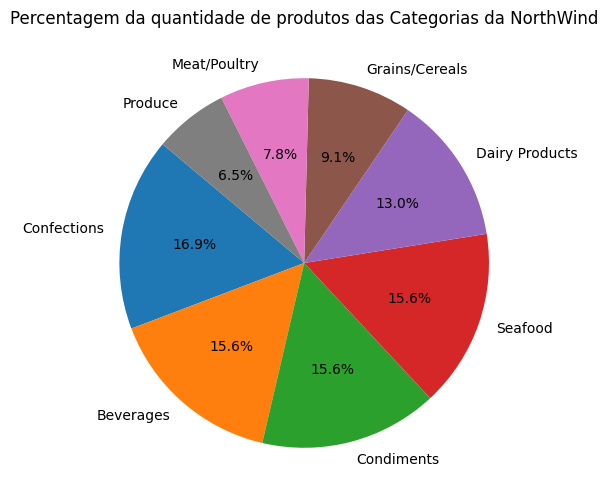

In [15]:
# Calcular o número de produtos por categoria
category_products_sum = merged_data.groupby('category_name')['product_id'].sum()

# Selecionar as 8 principais categorias
top_eight_categories = category_products_sum.nlargest(8)

# Calcular o total de produtos
total_products = category_products_sum.sum()

# Calcular as percentagens das 8 principais categorias
top_eight_percentages = (top_eight_categories / total_products) * 100

# Calcular a percentagem das outras categorias
other_percentage = 100 - top_eight_percentages.sum()


# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(top_eight_percentages, labels=top_eight_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentagem da quantidade de produtos das Categorias da NorthWind')
plt.savefig('pizza_chart.png')
plt.show()


![pizza_chart.png](![pizza_chart_top4.png](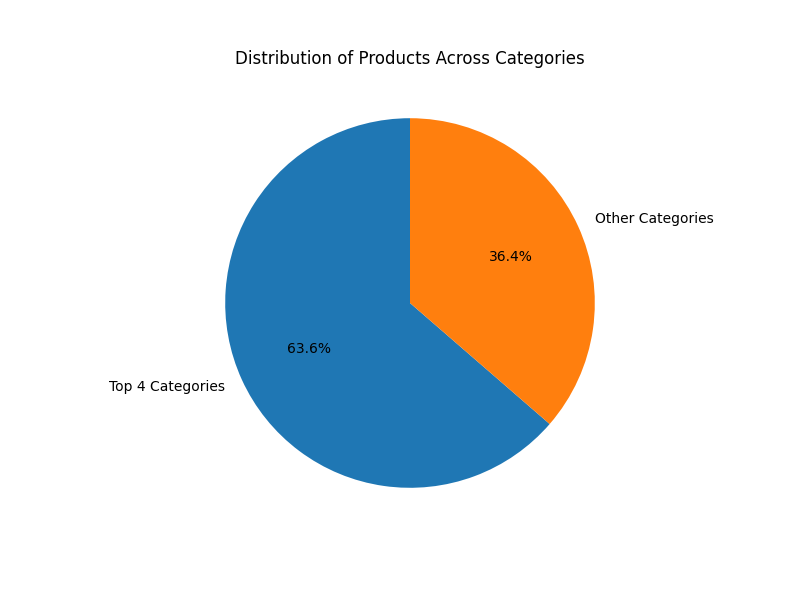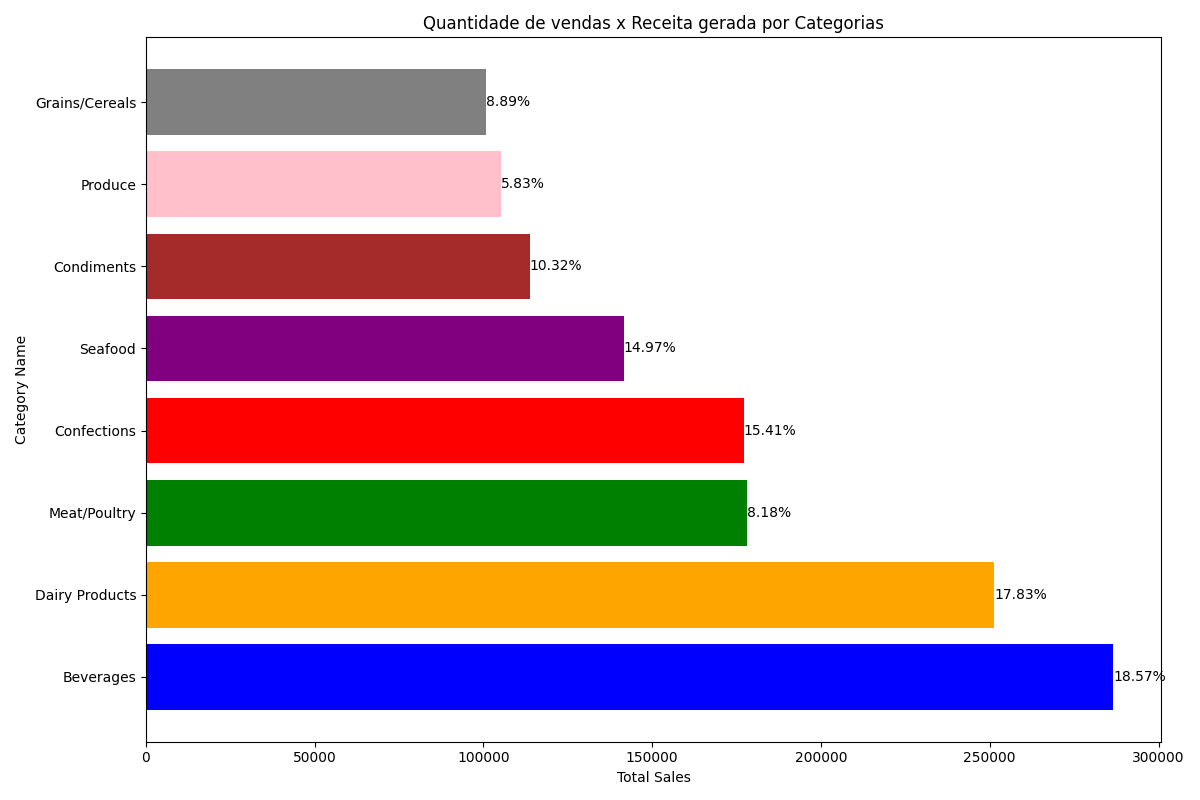)+jQodiwYQM2btyI7t2748Ybb8TSpUsRFhbW7H20adMGCxYswNy5cxEQEIAZM2ZAp9Ph559/xvDhwxEdHY1nnnkGS5YswbBhwyz+GojIPkim5oykIyIiIiIisgCeASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqthASEiIiIiIqv5fy/60AYuCI5gAAAAAElFTkSuQmCC)

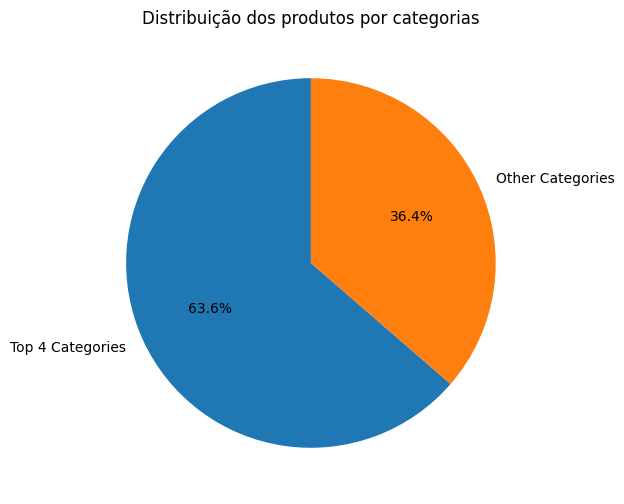

In [16]:
# Calcular o número de produtos por categoria
category_products_sum = merged_data.groupby('category_name')['product_id'].sum()

# Selecionar as 4 principais categorias
top_four_categories = category_products_sum.nlargest(4)

# Calcular o total de produtos
total_products = category_products_sum.sum()

# Calcular as percentagens das 4 principais categorias
top_four_percentages = (top_four_categories / total_products) * 100

# Calcular a percentagem das outras categorias
other_percentage = 100 - top_four_percentages.sum()

# Adicionar a percentagem das outras categorias ao DataFrame
top_four_percentages['Other'] = other_percentage
# Somar a quantidade das 4 categorias
top_four_sum = top_four_percentages.iloc[:-1].sum()

#Criar uma série para o gráfico de pizza
pie_data = pd.Series([top_four_sum, other_percentage], index=['Top 4 Categories', 'Other Categories'])


plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos produtos por categorias')
plt.savefig('pizza_chart_top4.png')
plt.show()

As quatro categorias com mais produtos tem quase o dobro de produtos das demais categorias. Porém isso não quer dizer que isso gere maior quantidade de vendas ou receita para a empresa.


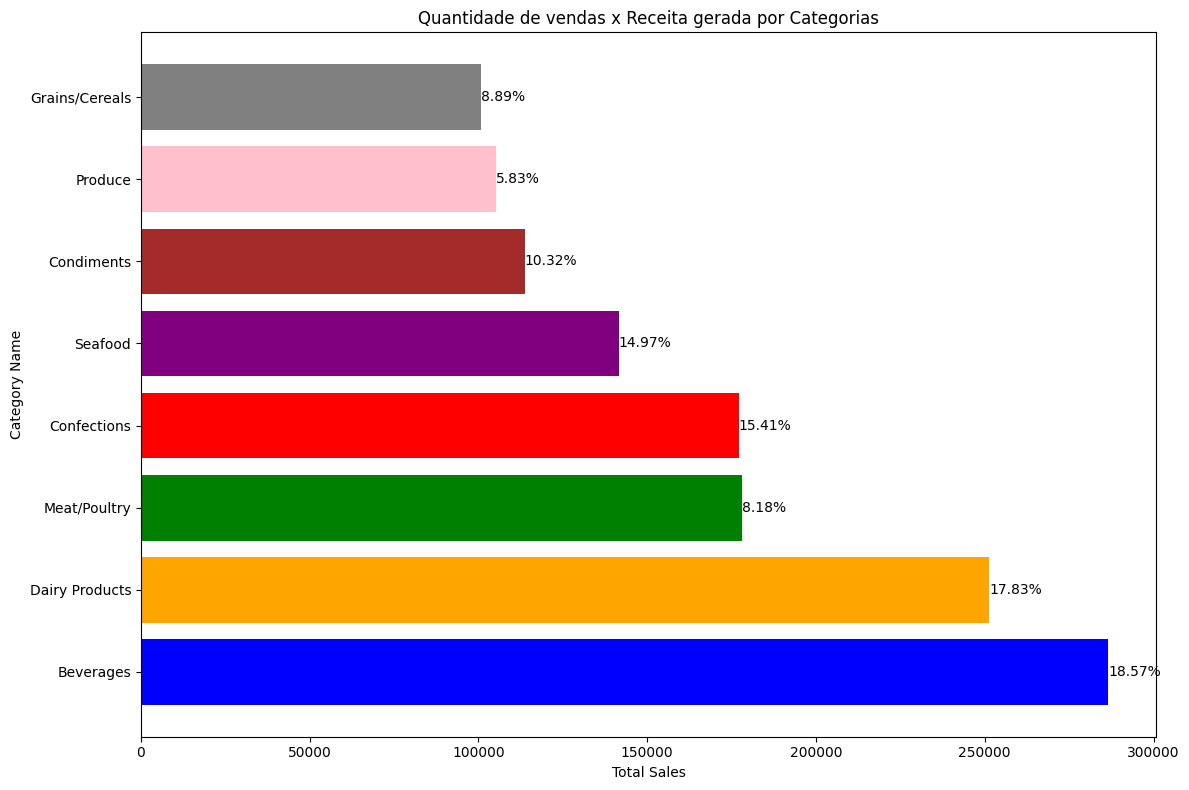

In [17]:

# Dicionário de cores para as categorias
colors = {
    'Beverages': 'blue',
    'Meat/Poultry': 'green',
    'Dairy Products': 'orange',
    'Confections': 'red',
    'Grains/Cereals': 'gray',
    'Produce': 'pink',
    'Seafood': 'purple',
    'Condiments': 'brown'
}


# Agrupar os detalhes do pedido pela categoria e calcular a soma do preço total de vendas para cada categoria
sales_by_category = full_merged_data1.groupby('category_name')['total_price'].sum().reset_index()

# Calcular o total de vendas de todas as categorias
total_sales = sales_by_category['total_price'].sum()

# Calcular a porcentagem de vendas de cada categoria em relação ao total de vendas
sales_by_category['sales_percentage'] = (sales_by_category['total_price'] / total_sales) * 100

# Ordenar os dados pela porcentagem de vendas em ordem decrescente
sales_by_category = sales_by_category.sort_values(by='sales_percentage', ascending=False)

# Calcular a quantidade total de vendas de todas as categorias
total_quantity = full_merged_data1['quantity'].sum()

# Calcular a quantidade de vendas de cada categoria e a porcentagem em relação ao total de vendas
quantity_by_category = full_merged_data1.groupby('category_name')['quantity'].sum().reset_index()
quantity_by_category['quantity_percentage'] = (quantity_by_category['quantity'] / total_quantity) * 100

# Merge com os dados de faturamento por categoria
sales_by_category = pd.merge(sales_by_category, quantity_by_category, on='category_name')

plt.figure(figsize=(12, 8))

# Plotar o faturamento de vendas por categoria
bars = plt.barh(sales_by_category['category_name'], sales_by_category['total_price'], color=[colors.get(category, 'skyblue') for category in sales_by_category['category_name']], label='Revenue')

# Adicionar a porcentagem de quantidade de vendas dentro de cada barra
for bar, percentage in zip(bars, sales_by_category['quantity_percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.title('Quantidade de vendas x Receita gerada por Categorias')

plt.tight_layout()
plt.savefig('bar_chart_qtdvender_receitacatego.png')
plt.show()




Notamos que Beverages e Dairy Products representam tanto a maior quantidade de vendas quanto geram mais receita para a NorthWind.
Lembrando que Dairy Products não estava nas 4 categorias com maior variedade de produtos.
Já meat/Poultry mesmo com uma quantidade menor de vendas fica em terceiro lugar na receita gerada.

In [18]:
full_merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           2155 non-null   int64  
 1   customer_id        2155 non-null   object 
 2   employee_id        2155 non-null   int64  
 3   order_date         2155 non-null   object 
 4   required_date      2155 non-null   object 
 5   shipped_date       2082 non-null   object 
 6   ship_via           2155 non-null   object 
 7   freight            2155 non-null   object 
 8   ship_name          2155 non-null   object 
 9   ship_address       2155 non-null   object 
 10  ship_city          2155 non-null   object 
 11  ship_region        856 non-null    object 
 12  ship_postal_code   2100 non-null   object 
 13  ship_country       2155 non-null   object 
 14  product_id         2155 non-null   int64  
 15  unit_price_x       2155 non-null   float64
 16  quantity           2155 

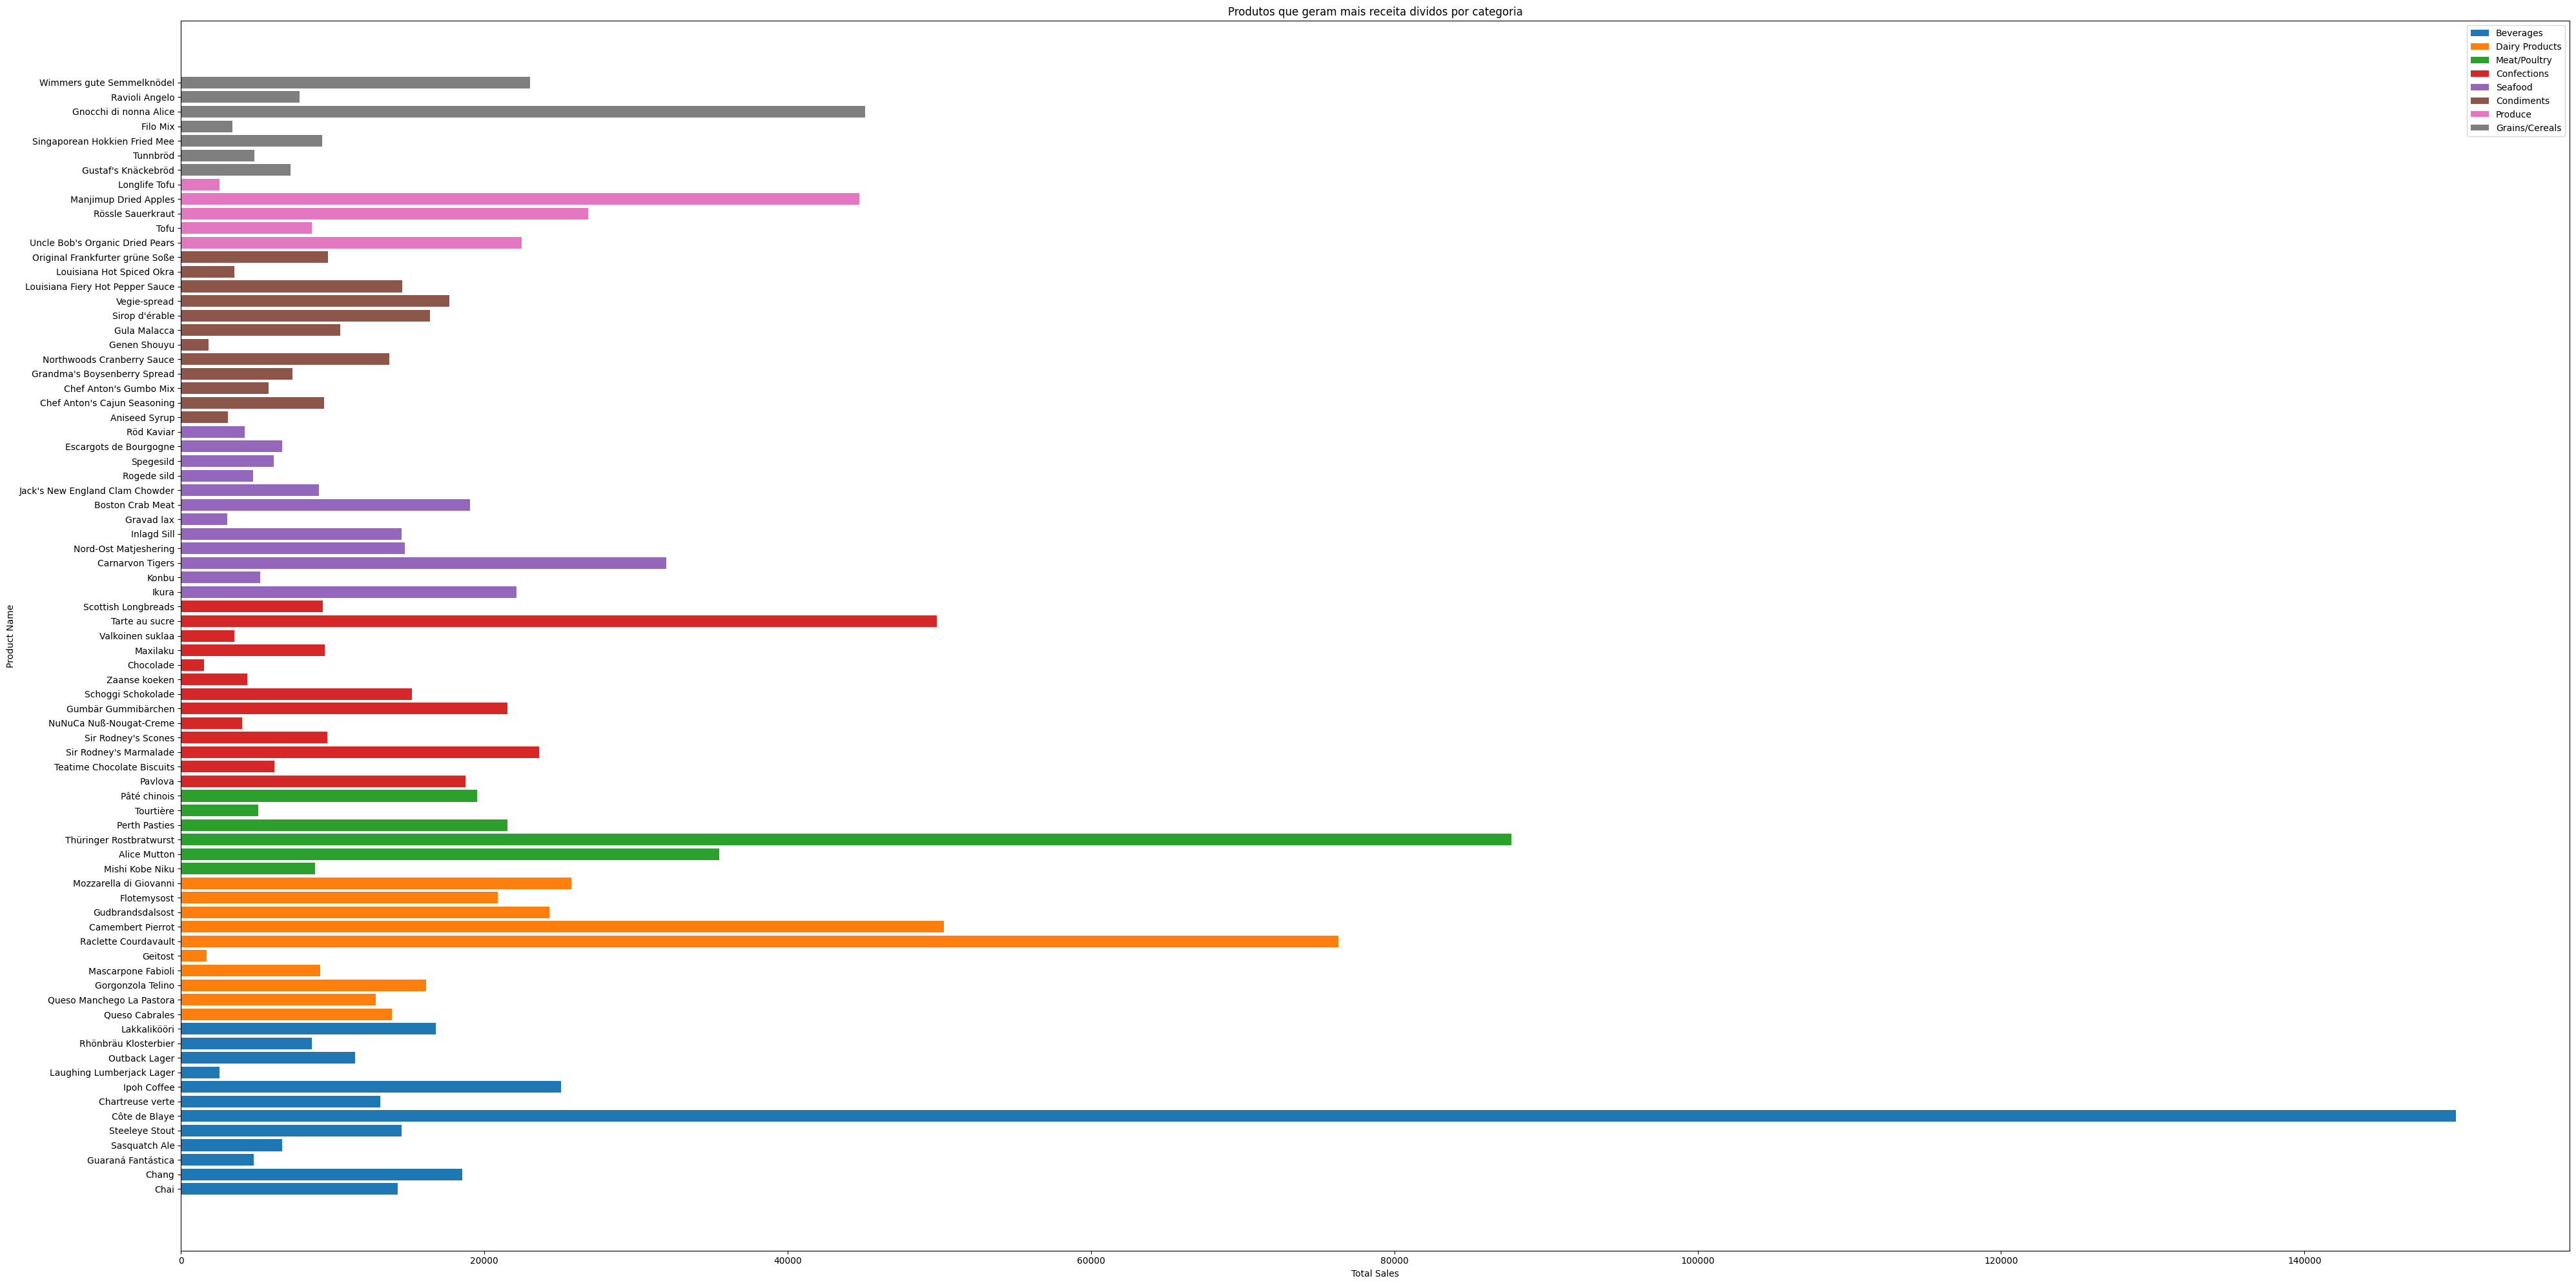

In [19]:
# Calcular o total de vendas de cada categoria
category_sales = full_merged_data1.groupby('category_name')['total_price'].sum().reset_index()

# Ordenar as categorias pela quantidade de vendas em ordem decrescente
category_sales = category_sales.sort_values(by='total_price', ascending=False)

# Agrupar os detalhes do pedido pelo ID do produto e pela categoria, e calcular a soma do preço total
sales_by_product_category = full_merged_data1.groupby(['category_id', 'product_id', 'product_name', 'category_name'])['total_price'].sum().reset_index()

# Selecionar o produto que gera o maior valor de venda para cada categoria
top_products_by_category = sales_by_product_category.sort_values('total_price', ascending=False).drop_duplicates('category_id')

# Ordenar os dados pelas categorias com maior quantidade de vendas
top_products_by_category = top_products_by_category.merge(category_sales, on='category_name')
top_products_by_category = top_products_by_category.sort_values(by='total_price_y', ascending=False)

# Gerar um plot para os produtos que geram maior valor de venda por categoria
plt.figure(figsize=(40, 20))

# Definir uma lista de cores para as categorias
colors = plt.cm.tab10(np.arange(len(top_products_by_category)))

# Plotar os produtos que geram maior valor de venda para cada categoria
for i, (category_name, color) in enumerate(zip(top_products_by_category['category_name'], colors)):
    products = sales_by_product_category[sales_by_product_category['category_name'] == category_name]
    plt.barh(products['product_name'], products['total_price'], color=color, label=category_name)

plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Produtos que geram mais receita dividos por categoria')

plt.legend()

plt.tight_layout()
plt.savefig('bar_chart_top_products_by_category.png')
plt.show()



![products]('bar_chart_top_products_by_category.png')

**Produtos mais vendidos de cada categoria**:

Beverages: Côte de Blaye (Vinho da região de Bordeaux)

Dairy Products: Raclette Courdavault (Queijo Francês)

Meat/Poutry : Thuringer Rostbratwurst (Salcicha alemã)

Confections : Tarte au sucre (Torta Canadense)

Seafood: Carnarvon Tigers (Camarões Australianos)

Condimentes: Veggie-spread (Pasta de vegetais)

Produce: Manjimup dried apples (Maças desidratadas de Majimup)

Grain/Cereals: Gnocchi di nonna Alice (Nhoque)

Vamos começar análise de séries temporais.
Vamos dividir os anos em trimestres e analisar a quantidade de produtos vendidos por cada categoria.

In [20]:
# Converter a coluna 'order_date' para datetime
full_merged_data1['order_date'] = pd.to_datetime(full_merged_data1['order_date'])

# Adicionar uma coluna para indicar o trimestre de cada venda
full_merged_data1['quarter'] = full_merged_data1['order_date'].dt.to_period('Q')

# Calcular a soma das quantidades por categoria e por trimestre
quantity_sum_by_category_quarter = full_merged_data1.groupby(['category_name', 'quarter'])['quantity'].sum().unstack()

# Exibir as primeiras 20 linhas do resultado
quantity_sum_by_category_quarter.head(20)


quarter,1996Q3,1996Q4,1997Q1,1997Q2,1997Q3,1997Q4,1998Q1,1998Q2
category_name,,,,,,,,
Beverages,904,938,1021,903,835,1237,2381,1313
Condiments,403,559,814,654,728,699,936,505
Confections,663,694,1313,792,916,1116,1795,617
Dairy Products,694,1392,1007,1130,1065,1172,1649,1040
Grains/Cereals,126,423,622,681,709,624,944,433
Meat/Poultry,287,663,701,359,460,669,527,533
Produce,210,339,349,406,247,581,446,412
Seafood,621,665,476,786,1298,1119,1968,748


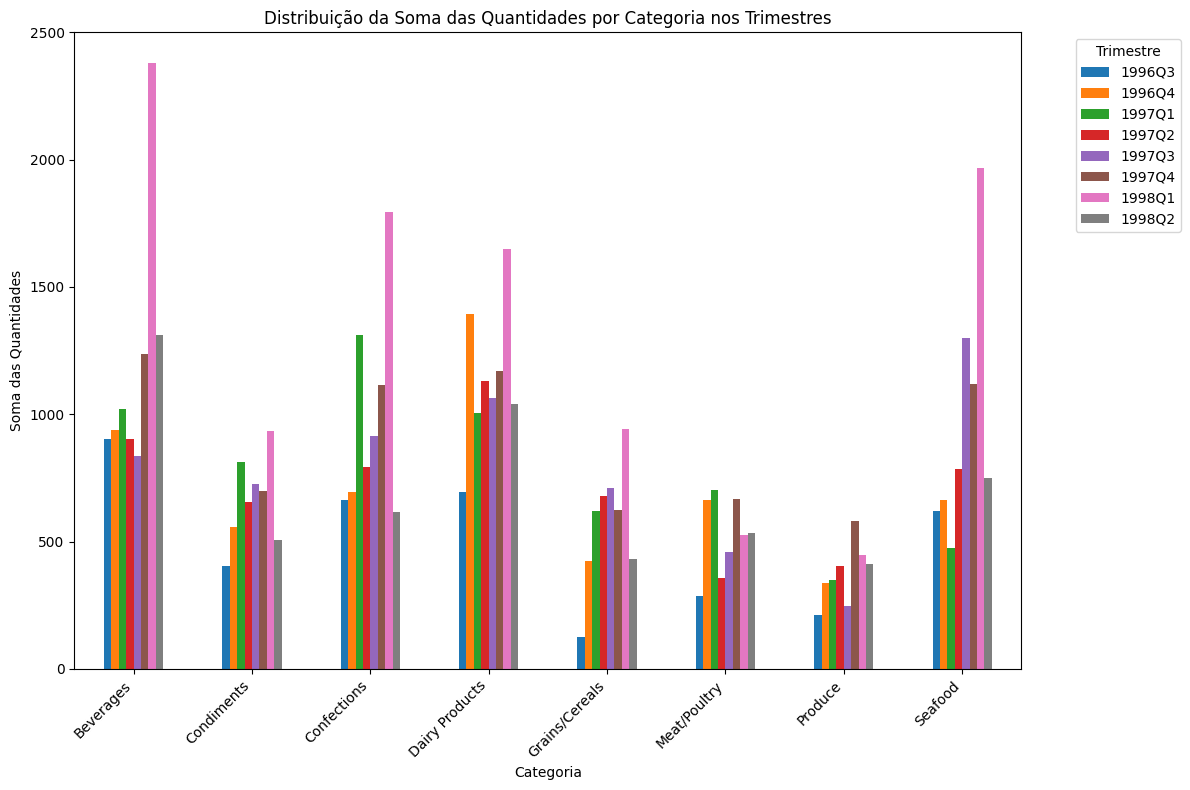

In [21]:
# Calcular a soma das quantidades por categoria e por trimestre
quantity_sum_by_category_quarter = full_merged_data1.groupby(['category_name', 'quarter'])['quantity'].sum().unstack()

# Plotar o gráfico de barras
quantity_sum_by_category_quarter.plot(kind='bar', figsize=(12, 8))
plt.title('Distribuição da Soma das Quantidades por Categoria nos Trimestres')
plt.xlabel('Categoria')
plt.ylabel('Soma das Quantidades')
plt.legend(title='Trimestre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bar_chart_qtd_categoria_trimestre.png')
plt.show()


![categorias x trimestres]('bar_chart_qtd_categoria_trimestre.png')

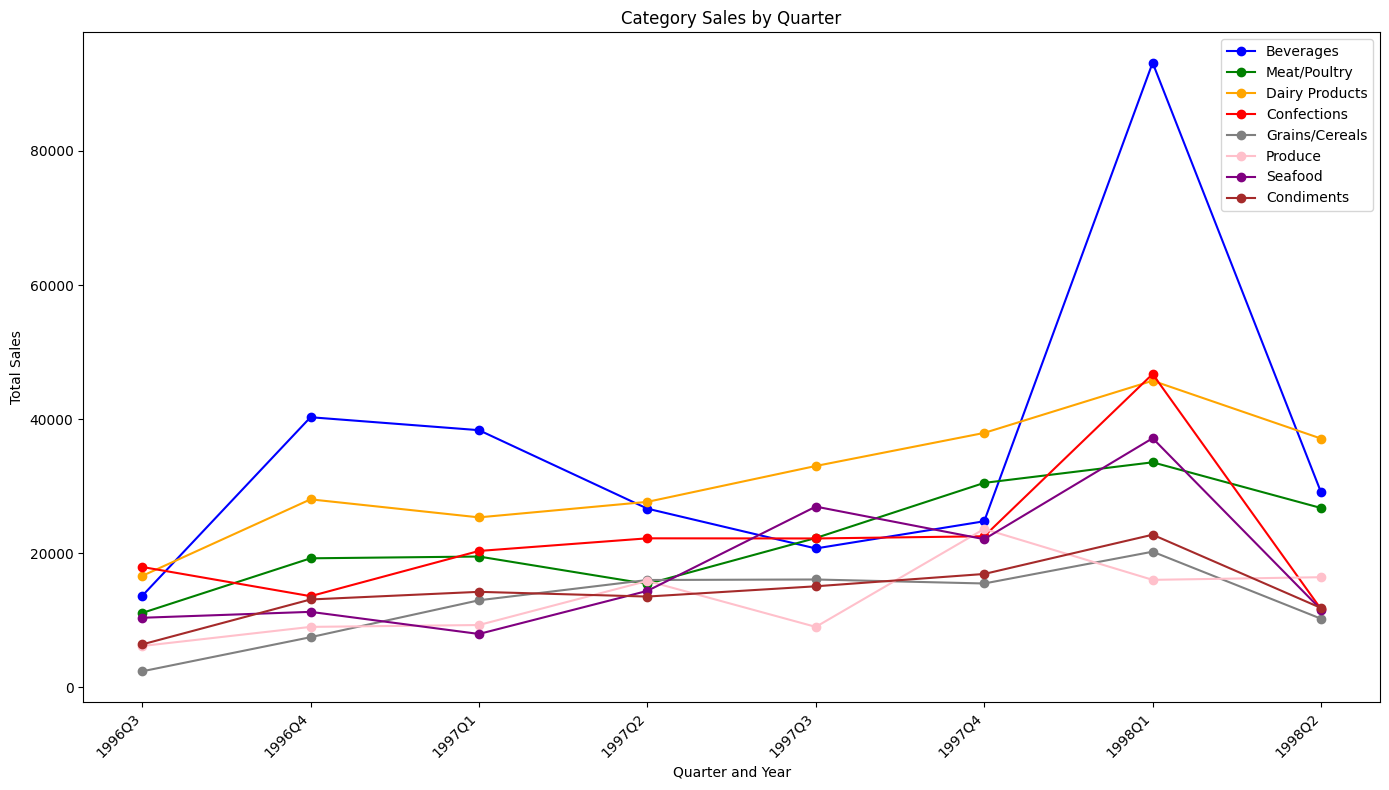

quarter          1996Q3   1996Q4   1997Q1    1997Q2    1997Q3    1997Q4  \
category_name                                                             
Beverages       13606.0  40273.2  38342.0  26633.50  20696.25  24752.25   
Condiments       6375.6  13082.7  14223.1  13518.65  15049.40  16887.85   
Confections     17936.3  13575.3  20320.7  22206.55  22185.83  22514.69   
Dairy Products  16594.0  28021.8  25332.4  27646.20  32999.60  37932.60   
Grains/Cereals   2363.4   7454.2  12963.6  15989.60  16065.00  15468.75   
Meat/Poultry    11067.9  19224.3  19490.3  15400.59  22252.48  30477.66   
Produce          6141.0   8993.2   9270.6  15849.30   8992.25  23606.40   
Seafood         10353.3  11236.3   7937.2  14366.70  26938.83  22077.92   

quarter           1998Q1    1998Q2  
category_name                       
Beverages       93156.75  29067.00  
Condiments      22745.95  11811.50  
Confections     46716.75  11642.98  
Dairy Products  45715.80  37088.10  
Grains/Cereals  20212.00  1

In [22]:
# Calcular o faturamento de cada categoria por trimestre
category_sales_by_quarter = full_merged_data1.groupby(['category_name', 'quarter'])['total_price'].sum().unstack()

# Definir as cores para cada categoria
colors = {
    'Beverages': 'blue',
    'Meat/Poultry': 'green',
    'Dairy Products': 'orange',
    'Confections': 'red',
    'Grains/Cereals': 'gray',
    'Produce': 'pink',
    'Seafood': 'purple',
    'Condiments': 'brown'
}

# Converter os índices de período em strings para o eixo x
x_labels = [str(period) for period in category_sales_by_quarter.columns]

# Gerar o plot
plt.figure(figsize=(14, 8))
for category, color in colors.items():
    if category in category_sales_by_quarter.index:
        plt.plot(x_labels, category_sales_by_quarter.loc[category], marker='o', linestyle='-', color=color, label=category)

# Adicionar título e rótulos aos eixos
plt.title('Category Sales by Quarter')
plt.xlabel('Quarter and Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# Adicionar legenda
plt.legend()

# Exibir o plot
plt.tight_layout()
plt.savefig('Vendas das categorias por trimestres.png')
plt.show()

# Extrair o trimestre da data do pedido
full_merged_data1['quarter'] = full_merged_data1['order_date'].dt.to_period('Q')

# Calcular o faturamento de cada categoria por trimestre
category_sales_by_quarter = full_merged_data1.groupby(['category_name', 'quarter'])['total_price'].sum().unstack()

# Exibir a tabela de vendas trimestrais
print(category_sales_by_quarter)


![linechart_catego]('line_chart_category_sales_by_quarter.png')

Notamos que em praticamente todas as categorias houve uma ascenção na quantidade de vendas desde quando se iniciou os registros de venda no terceiro trimestre de 1996 até o primeiro trimestre de 1998.
O segundo trimestre de 1998 está fechando em baixa em relação ao trimestre anterior, devemos lembrar que está faltando as vendas do mês de Junho nesse relatório. Então mais abaixo faremos essa projeção de junho.

In [23]:
# Calcular o preço total para cada item de linha do pedido
order_details['total_price'] = order_details['quantity'] * order_details['unit_price']


# Adicionar uma coluna para indicar o trimestre e o mês de cada pedido
full_merged_data1['order_date'] = pd.to_datetime(full_merged_data1['order_date'])
full_merged_data1['quarter'] = full_merged_data1['order_date'].dt.to_period('Q')
full_merged_data1['month'] = full_merged_data1['order_date'].dt.to_period('M')

# Filtrar os dados para o segundo trimestre de 1998
q2_1998_data = full_merged_data1[full_merged_data1['quarter'] == '1998Q2']

# Calcular o total de vendas nos primeiros dois meses do segundo trimestre de 1998
q2_1998_first_two_months_data = q2_1998_data[(q2_1998_data['month'] == '1998-04') | (q2_1998_data['month'] == '1998-05')]

# Calcular o total de vendas nos primeiros dois meses do segundo trimestre de 1998 por categoria
total_sales_first_two_months = q2_1998_first_two_months_data.groupby('category_name')['total_price'].sum().reset_index()

# Calcular a média diária de vendas para o segundo trimestre de 1998 até a data atual por categoria
q2_1998_data['day'] = q2_1998_data['order_date'].dt.dayofyear
days_passed = q2_1998_data['day'].nunique()

# Excluindo os dias de junho já passados para a projeção correta
days_passed_until_may = (pd.Timestamp('1998-05-31') - pd.Timestamp('1998-04-01')).days + 1

# Calcular a média diária de vendas para abril e maio
average_daily_sales_until_may = q2_1998_first_two_months_data.groupby('category_name')['total_price'].sum() / days_passed_until_may
average_daily_sales_until_may = average_daily_sales_until_may.reset_index()

# Calcular o número de dias restantes em junho
remaining_days_june = (pd.Timestamp('1998-06-30') - pd.Timestamp('1998-06-01')).days + 1

# Projeção de vendas para o terceiro mês (junho) do segundo trimestre de 1998 por categoria
average_daily_sales_until_may['projected_sales_june'] = average_daily_sales_until_may['total_price'] * remaining_days_june

# Fechamento projetado do segundo trimestre de 1998 por categoria
total_sales_first_two_months = total_sales_first_two_months.rename(columns={'total_price': 'Total Sales (Apr-May)'})
total_sales_first_two_months = total_sales_first_two_months.merge(average_daily_sales_until_may[['category_name', 'projected_sales_june']], on='category_name')
total_sales_first_two_months['Projected Total Sales (Q2)'] = total_sales_first_two_months['Total Sales (Apr-May)'] + total_sales_first_two_months['projected_sales_june']

# Formatar os valores como moeda
total_sales_first_two_months['Total Sales (Apr-May)'] = total_sales_first_two_months['Total Sales (Apr-May)'].map('${:,.2f}'.format)
total_sales_first_two_months['projected_sales_june'] = total_sales_first_two_months['projected_sales_june'].map('${:,.2f}'.format)
total_sales_first_two_months['Projected Total Sales (Q2)'] = total_sales_first_two_months['Projected Total Sales (Q2)'].map('${:,.2f}'.format)

# Exibir a tabela
print(total_sales_first_two_months)




    category_name Total Sales (Apr-May) projected_sales_june  \
0       Beverages            $29,067.00           $14,295.25   
1      Condiments            $11,811.50            $5,808.93   
2     Confections            $11,642.98            $5,726.06   
3  Dairy Products            $37,088.10           $18,240.05   
4  Grains/Cereals            $10,210.25            $5,021.43   
5    Meat/Poultry            $26,728.88           $13,145.35   
6         Produce            $16,406.05            $8,068.55   
7         Seafood            $11,574.46            $5,692.36   

  Projected Total Sales (Q2)  
0                 $43,362.25  
1                 $17,620.43  
2                 $17,369.04  
3                 $55,328.15  
4                 $15,231.68  
5                 $39,874.23  
6                 $24,474.60  
7                 $17,266.82  


<ipython-input-23-629648e36892>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_1998_data['day'] = q2_1998_data['order_date'].dt.dayofyear


In [24]:
full_merged_data1['total_price'].head(20)

0      168.0
1      201.6
2      840.0
3      201.6
4      403.2
5      504.0
6      100.8
7      504.0
8      100.8
9      168.0
10      84.0
11     252.0
12      63.0
13    1050.0
14     315.0
15     210.0
16     315.0
17     735.0
18     315.0
19     294.0
Name: total_price, dtype: float64

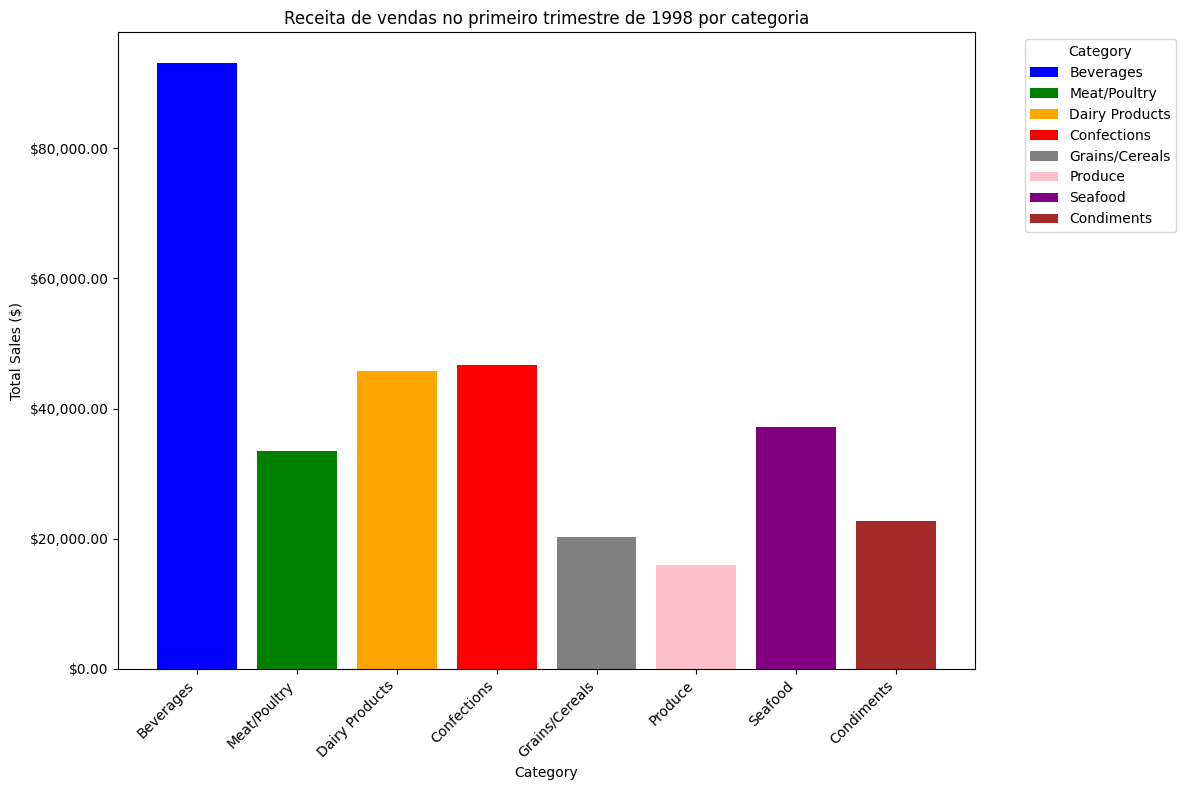

In [25]:
# Definir as cores para cada categoria
colors = {
    'Beverages': 'blue',
    'Meat/Poultry': 'green',
    'Dairy Products': 'orange',
    'Confections': 'red',
    'Grains/Cereals': 'gray',
    'Produce': 'pink',
    'Seafood': 'purple',
    'Condiments': 'brown'
}

# Filtrar os dados para o primeiro trimestre de 1998
first_quarter_1998 = full_merged_data1[(full_merged_data1['order_date'] >= '1998-01-01') & (full_merged_data1['order_date'] <= '1998-03-31')]

# Calcular a soma dos valores totais de vendas por categoria para o primeiro trimestre de 1998
total_sales_first_quarter_1998 = first_quarter_1998.groupby('category_name')['total_price'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
for category, color in colors.items():
    category_data = total_sales_first_quarter_1998[total_sales_first_quarter_1998['category_name'] == category]
    if not category_data.empty:
        plt.bar(category_data['category_name'], category_data['total_price'], color=color, label=category)

# Adicionar rótulos e título
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title('Receita de vendas no primeiro trimestre de 1998 por categoria')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Formatando o eixo y para exibir números em formato de moeda
plt.gca().yaxis.set_major_formatter('${:,.2f}'.format)

# Adicionar legenda
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.savefig('bar_chart_receita_primeiro_trimestre.png')
plt.show()



![receita 1 trimestre]('bar_chart_receita_primeiro_trimestre.png')

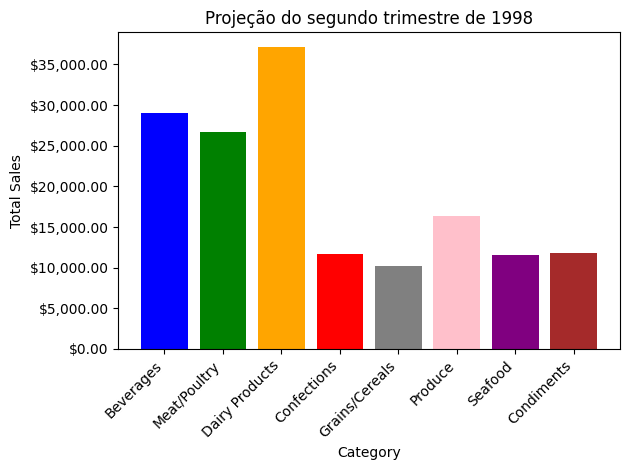

In [26]:
colors = {
    'Beverages': 'blue',
    'Meat/Poultry': 'green',
    'Dairy Products': 'orange',
    'Confections': 'red',
    'Grains/Cereals': 'gray',
    'Produce': 'pink',
    'Seafood': 'purple',
    'Condiments': 'brown'
}
# Calcular o total de vendas para cada categoria nos meses de abril, maio e junho
total_sales_april_may_june = full_merged_data1[(full_merged_data1['month'] >= '1998-04') & (full_merged_data1['month'] <= '1998-06')].groupby('category_name')['total_price'].sum().reset_index()

# Criar o gráfico de barras
for category, color in colors.items():
    category_data = total_sales_april_may_june[total_sales_april_may_june['category_name'] == category]
    plt.bar(category_data['category_name'], category_data['total_price'], color=color, label=category)

# Adicionar rótulos e título
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Projeção do segundo trimestre de 1998')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Formatando o eixo y para exibir números sem ponto e com aumento nas casas decimais
plt.gca().yaxis.set_major_formatter('${:,.2f}'.format)

# Exibir o gráfico
plt.tight_layout()
plt.savefig('bar_chart_projeção_segundo_trimestre.png')
plt.show()


![segundo trimestre]('bar_chart_projeção_segundo_trimestre.png')

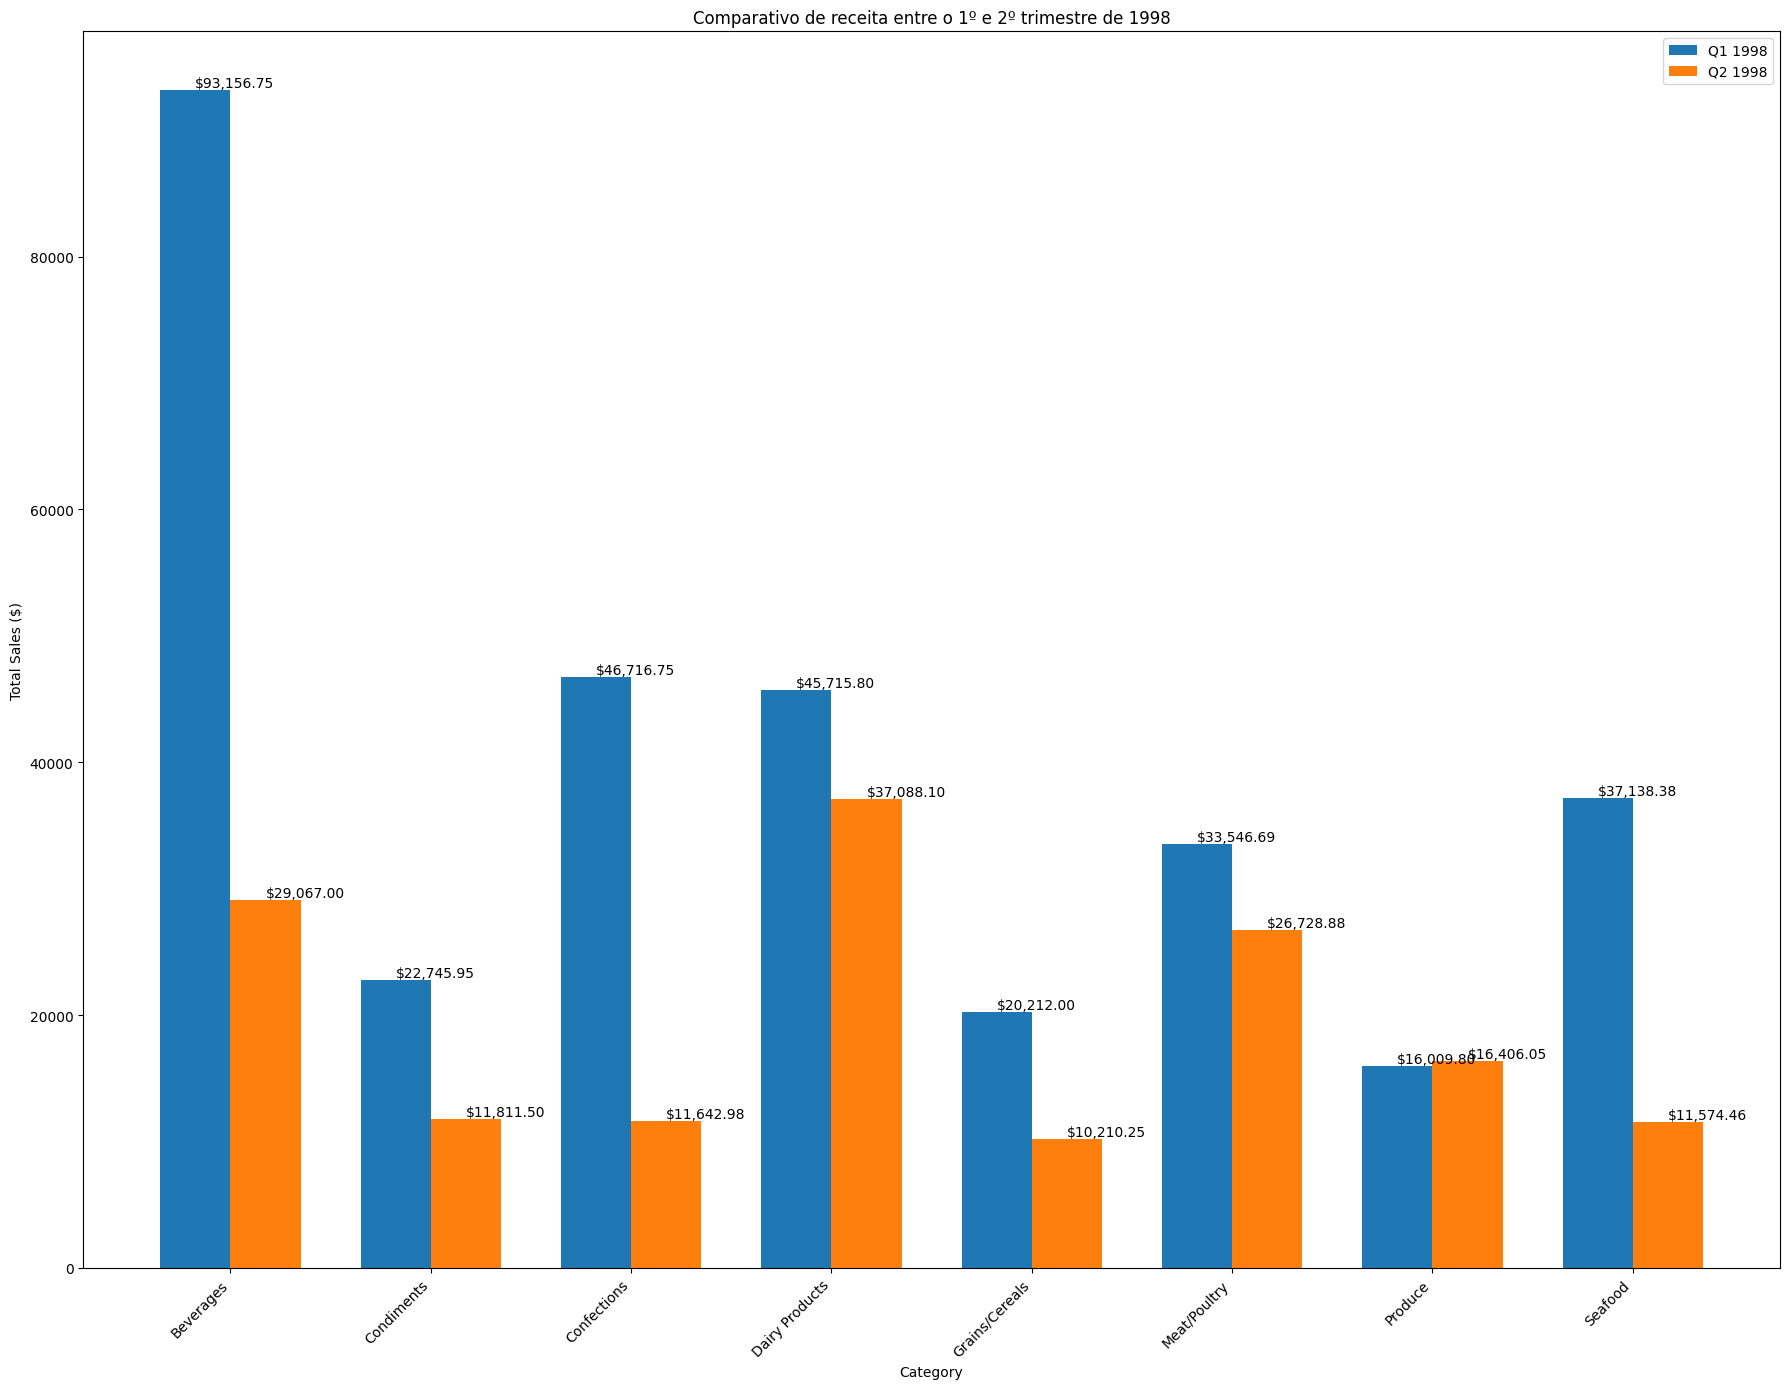

In [27]:

# Definir as cores para cada categoria
colors = {
    'Beverages': 'blue',
    'Meat/Poultry': 'green',
    'Dairy Products': 'orange',
    'Confections': 'red',
    'Grains/Cereals': 'gray',
    'Produce': 'pink',
    'Seafood': 'purple',
    'Condiments': 'brown'
}

# Filtrar os dados para o primeiro e o segundo trimestre de 1998
first_quarter_1998 = full_merged_data1[(full_merged_data1['order_date'] >= '1998-01-01') & (full_merged_data1['order_date'] <= '1998-03-31')]
second_quarter_1998 = full_merged_data1[(full_merged_data1['order_date'] >= '1998-04-01') & (full_merged_data1['order_date'] <= '1998-06-30')]

# Calcular a soma dos valores totais de vendas por categoria para cada trimestre
total_sales_first_quarter_1998 = first_quarter_1998.groupby('category_name')['total_price'].sum().reset_index()
total_sales_second_quarter_1998 = second_quarter_1998.groupby('category_name')['total_price'].sum().reset_index()

# Mesclar os dois DataFrames para ter os dados lado a lado
comparison_data = pd.merge(total_sales_first_quarter_1998, total_sales_second_quarter_1998, on='category_name', how='outer', suffixes=('_Q1', '_Q2')).fillna(0)

# Configurar a largura das barras
bar_width = 0.35

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(18, 14))
categories = comparison_data['category_name']
index = range(len(categories))

# Barras do primeiro trimestre
bars1 = ax.bar([i - bar_width/2 for i in index], comparison_data['total_price_Q1'], bar_width, label='Q1 1998')

# Barras do segundo trimestre
bars2 = ax.bar([i + bar_width/2 for i in index], comparison_data['total_price_Q2'], bar_width, label='Q2 1998')

# Adicionar rótulos e título
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Comparativo de receita entre o 1º e 2º trimestre de 1998')
ax.set_xticks(index)
ax.set_xticklabels(categories, rotation=45, ha='right')

# Adicionar legenda
ax.legend()

# Adicionar rótulos com valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.2f}', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.savefig('bar_chart_comparativo_receita.png')
plt.show()


![diferença 1 e 2 trimestre]('bar_chart_comparativo_receita.png')

<ipython-input-28-3fcb34ad20ce>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(comparison_data['category_name'], rotation=45, ha='right')


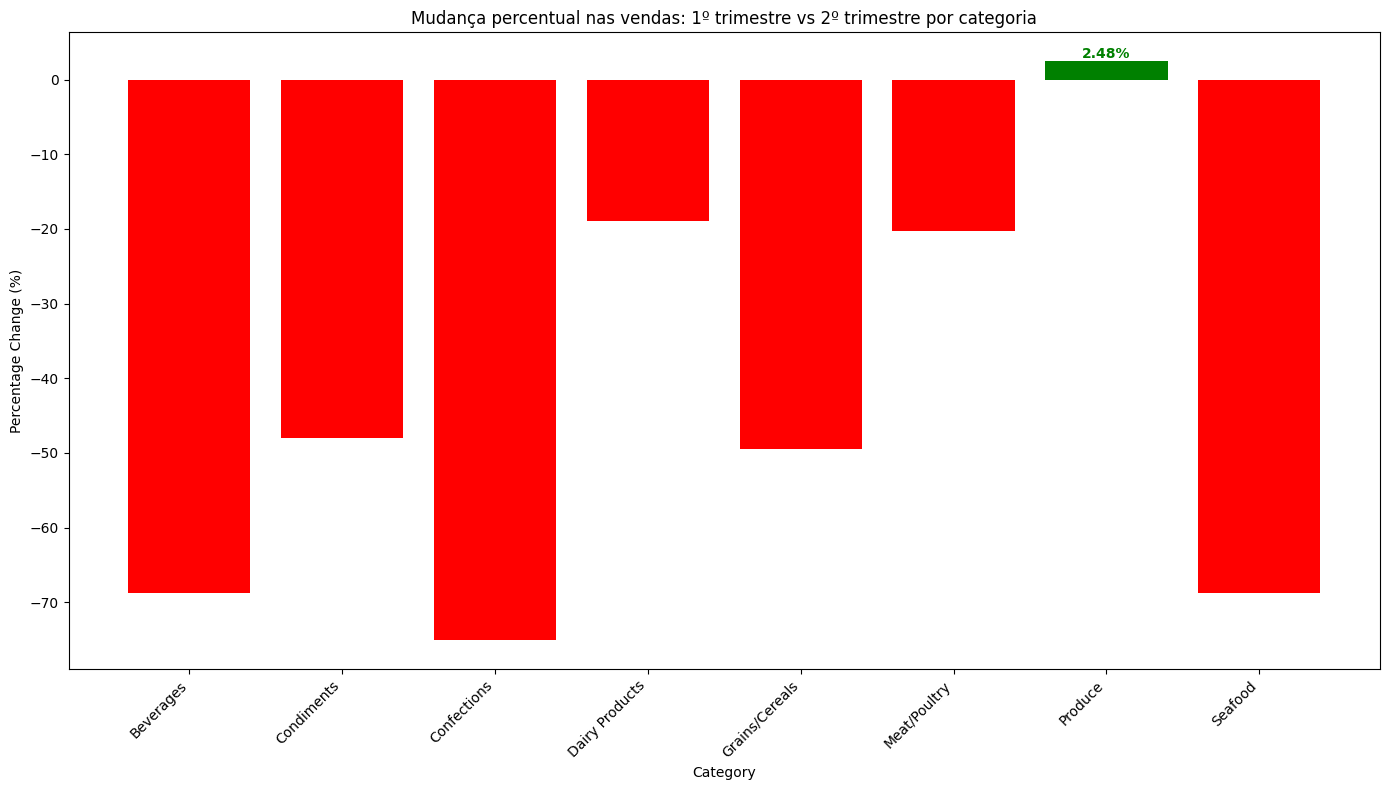

In [28]:
# Calcular a variação percentual de vendas para cada categoria
comparison_data['percent_change'] = ((comparison_data['total_price_Q2'] - comparison_data['total_price_Q1']) / comparison_data['total_price_Q1']) * 100

# Criar o gráfico de barras para a variação percentual
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(comparison_data['category_name'], comparison_data['percent_change'], color=comparison_data['percent_change'].apply(lambda x: 'green' if x > 0 else 'red'))

# Adicionar rótulos e título
ax.set_xlabel('Category')
ax.set_ylabel('Percentage Change (%)')
ax.set_title('Mudança percentual nas vendas: 1º trimestre vs 2º trimestre por categoria')
ax.set_xticklabels(comparison_data['category_name'], rotation=45, ha='right')

# Adicionar labels nas barras com cores
for bar, pct_change in zip(bars, comparison_data['percent_change']):
    yval = bar.get_height()
    color = 'green' if pct_change > 0 else 'red'
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{pct_change:.2f}%', va='bottom', ha='center', color=color, weight='bold')

# Exibir o gráfico
plt.tight_layout()
plt.savefig('bar_chart_mudanca_percentual.png')
plt.show()


![Percentual_1 e 2 trimestre]('bar_chart_mudanca_percentual.png')

Observamos que apenas a categoria "Produce" teve um aumento, mesmo que baixo em comparação com o trimestre passado.
As categorias "Beverages" e "Confections" que mais geraram receita no 1º trimestre de 1998, também foram as que apresentaram maior queda de receita.

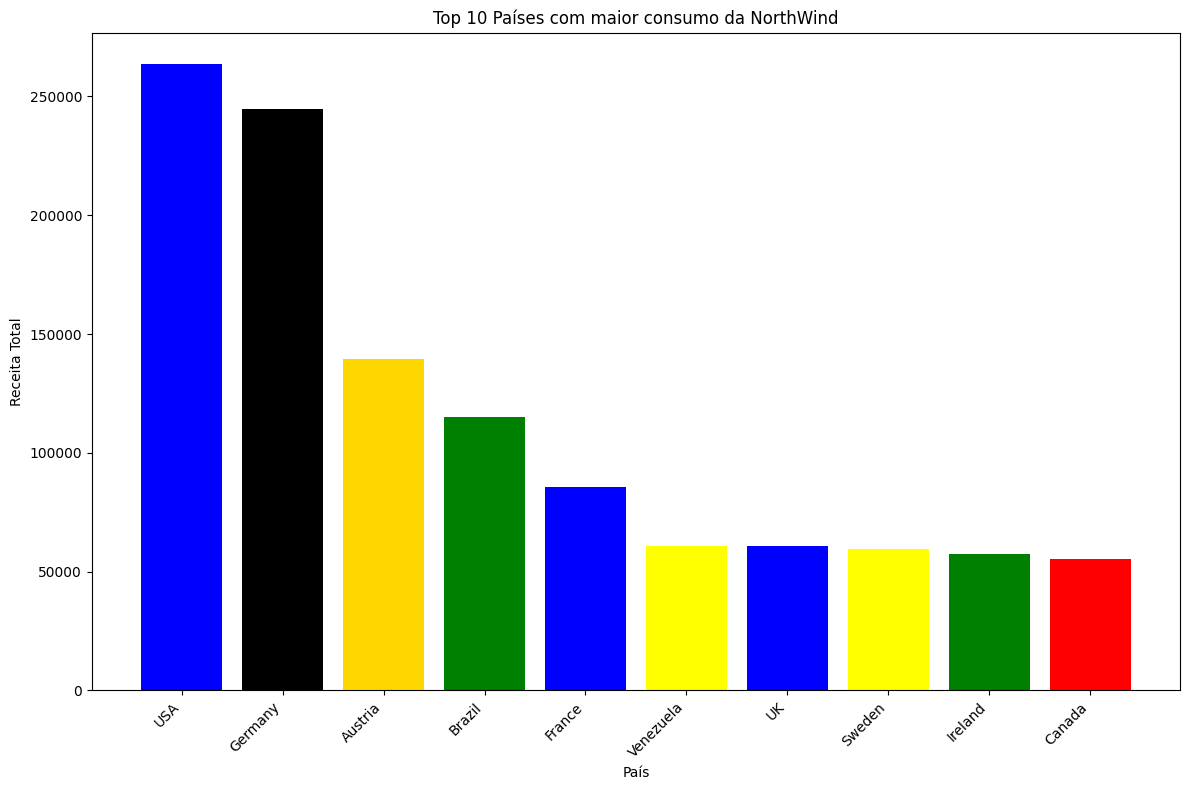

In [29]:
# Definir o dicionário de cores para os países
country_color = {
    'USA': 'blue', 'Canada': 'red', 'Brazil': 'green', 'UK': 'blue', 'Germany': 'black',
    'France': 'blue', 'Italy': 'green', 'Australia': 'blue', 'Spain': 'red', 'Mexico': 'green',
    'Argentina': 'skyblue', 'Austria': 'gold', 'Belgium': 'black', 'Denmark': 'red', 'Finland': 'blue',
    'Ireland': 'green', 'Poland': 'red', 'Norway': 'blue', 'Portugal': 'red', 'Sweden': 'yellow',
    'Switzerland': 'red', 'Venezuela': 'yellow'
}

# Calcular a receita total por país
revenue_by_country = full_merged_data1.groupby('ship_country')['total_price'].sum().reset_index()

# Ordenar o DataFrame por receita total em ordem decrescente e selecionar os top 10 países
revenue_by_country_sorted = revenue_by_country.sort_values(by='total_price', ascending=False).head(10)

# Plotar o gráfico de barras com as cores definidas pelo dicionário
plt.figure(figsize=(12, 8))
bars = plt.bar(revenue_by_country_sorted['ship_country'], revenue_by_country_sorted['total_price'], color=[country_color[country] for country in revenue_by_country_sorted['ship_country']])

plt.xlabel('País')
plt.ylabel('Receita Total')
plt.title('Top 10 Países com maior consumo da NorthWind')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bar_chart_top_10_paises.png')
plt.show()



![top_10]('bar_chart_top_10_paises.png')

In [30]:
# Agrupar os dados por país e categoria e calcular a receita total de cada categoria em cada país
revenue_by_country_category = full_merged_data1.groupby(['ship_country', 'category_name'])['total_price'].sum().reset_index()

# Ordenar os dados pela receita total em ordem descendente para cada país
revenue_by_country_category_sorted = revenue_by_country_category.sort_values(by=['ship_country', 'total_price'], ascending=[True, False])

# Selecionar as top 4 categorias para cada país
top_categories_by_country = revenue_by_country_category_sorted.groupby('ship_country').head(4)

# Construir uma tabela com os resultados
top_categories_table = top_categories_by_country.pivot(index='ship_country', columns='category_name', values='total_price')
top_categories_table.reset_index(inplace=True)
top_categories_table.columns.name = None # Remove o nome da coluna
top_categories_table = top_categories_table.rename(columns={'ship_country': 'País'})
top_categories_table = top_categories_table.fillna(0) # Preencher valores NaN com 0

print(top_categories_table)




           País  Beverages  Condiments  Confections  Dairy Products  \
0     Argentina    1798.00        0.00      2135.10          1143.5   
1       Austria   26452.05    16802.40         0.00         30342.9   
2       Belgium    5864.40        0.00      7711.18          8825.0   
3        Brazil   40400.50        0.00     12164.73         16894.5   
4        Canada   13829.70        0.00      9302.40         10102.0   
5       Denmark   12025.70     4455.40         0.00             0.0   
6       Finland    2222.00        0.00         0.00          6027.8   
7        France   13670.00        0.00     13215.85             0.0   
8       Germany   57644.60        0.00     37799.44         53170.9   
9       Ireland       0.00     3898.50         0.00         11093.4   
10        Italy       0.00        0.00      2787.70          4376.8   
11       Mexico    8097.50        0.00         0.00          4912.4   
12       Norway    2756.00        0.00         0.00           786.0   
13    

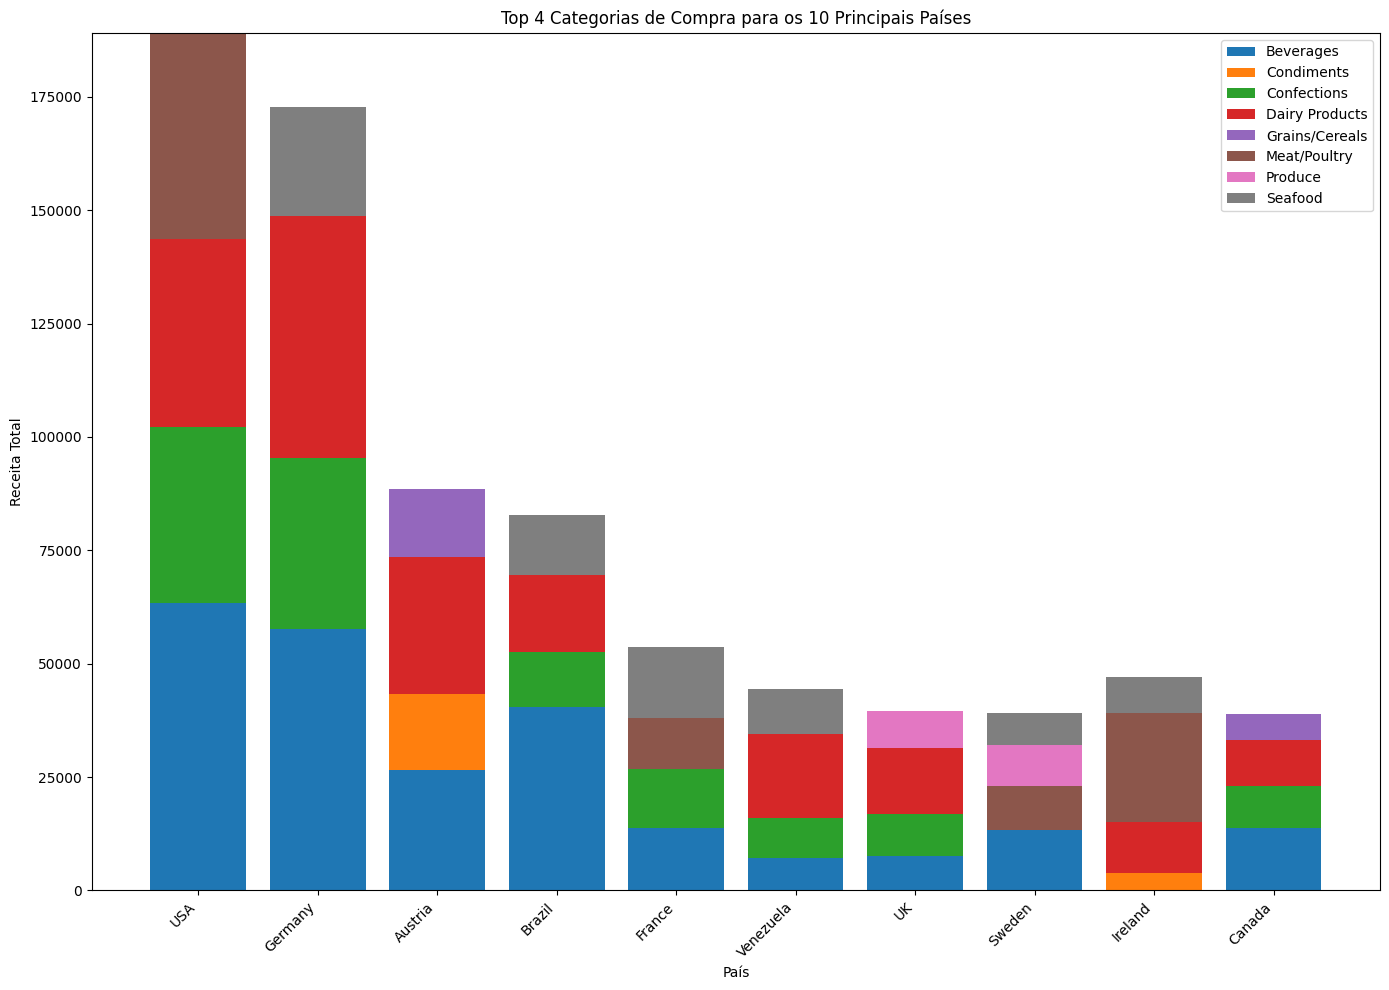

In [31]:
# Ordenar o DataFrame pelas top 4 categorias em ordem decrescente de receita
top_categories_table_sorted = top_categories_table.set_index('País').reindex(revenue_by_country_sorted['ship_country']).reset_index()

# Definir os países e as top 4 categorias
countries = top_categories_table_sorted['ship_country']
categories = top_categories_table_sorted.columns[1:]

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(14, 10))
bottom = None
for category in categories:
    values = top_categories_table_sorted[category]
    if bottom is None:
        plt.bar(countries, values, label=category)
        bottom = values
    else:
        plt.bar(countries, values, bottom=bottom, label=category)
        bottom += values

# Adicionar rótulos e título
plt.xlabel('País')
plt.ylabel('Receita Total')
plt.title('Top 4 Categorias de Compra para os 10 Principais Países')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.savefig('bar_chart_top_4_categorias.png')
plt.show()





![top_4_categories_countrys]('bar_chart_top_4_categorias.png')

Notamos que o carro-chefe na maioria dos países são "Beverages"
Na Austria, Venezuela e UK temos Dairy products como itens mais comprados.
Na Irlanda temos Mealt/Poultry como item mais comprado.

In [32]:
# Agrupar os dados por país e cliente e calcular a receita total de cada cliente em cada país
revenue_by_customer_country = full_merged_data1.groupby(['ship_country', 'customer_id'])['total_price'].sum().reset_index()

# Ordenar os clientes em cada país pela receita total em ordem decrescente
revenue_by_customer_country_sorted = revenue_by_customer_country.sort_values(by=['ship_country', 'total_price'], ascending=[True, False])

# Selecionar o cliente que gera a maior receita em cada país
top_customers_by_country = revenue_by_customer_country_sorted.groupby('ship_country').first()

# Inicializar uma lista para armazenar as top 4 categorias de cada cliente
top_categories_per_customer = []

# Para cada país, encontrar as top 4 categorias que geram mais receita para o cliente
for country, customer_id in top_customers_by_country[['customer_id']].itertuples():
    # Filtrar os dados pelo país e cliente correspondentes
    customer_data = full_merged_data1[(full_merged_data1['ship_country'] == country) & (full_merged_data1['customer_id'] == customer_id)]

    # Agrupar os dados por categoria e calcular a receita total em ordem decrescente
    revenue_by_category = customer_data.groupby('category_name')['total_price'].sum().reset_index()
    revenue_by_category_sorted = revenue_by_category.sort_values(by='total_price', ascending=False)

    # Selecionar as 4 categorias que geram mais receita para o cliente
    top_categories = revenue_by_category_sorted['category_name'].head(4).tolist()

    # Adicionar as top 4 categorias à lista
    top_categories_per_customer.append(top_categories)

# Construir uma tabela com os resultados
top_categories_per_customer_table = pd.DataFrame({
    'País': top_customers_by_country.index,
    'Cliente': top_customers_by_country['customer_id'],
    'Top 1 Categoria': [categories[0] for categories in top_categories_per_customer],
    'Top 2 Categoria': [categories[1] for categories in top_categories_per_customer],
    'Top 3 Categoria': [categories[2] for categories in top_categories_per_customer],
    'Top 4 Categoria': [categories[3] for categories in top_categories_per_customer]
})

# Exibir a tabela
print(top_categories_per_customer_table)


                     País Cliente Top 1 Categoria Top 2 Categoria  \
ship_country                                                        
Argentina       Argentina   OCEAN     Confections  Dairy Products   
Austria           Austria   ERNSH  Dairy Products      Condiments   
Belgium           Belgium   SUPRD  Dairy Products     Confections   
Brazil             Brazil   HANAR       Beverages         Seafood   
Canada             Canada   MEREP       Beverages  Dairy Products   
Denmark           Denmark   SIMOB       Beverages         Produce   
Finland           Finland   WARTH  Dairy Products    Meat/Poultry   
France             France   BONAP         Seafood         Produce   
Germany           Germany   QUICK       Beverages     Confections   
Ireland           Ireland   HUNGO    Meat/Poultry  Dairy Products   
Italy               Italy   MAGAA  Dairy Products     Confections   
Mexico             Mexico   TORTU       Beverages      Condiments   
Norway             Norway   SANTG 

In [33]:
# Agrupar os dados por cliente e calcular a receita total gerada por cada cliente
revenue_by_customer = full_merged_data1.groupby(['customer_id', 'ship_country'])['total_price'].sum().reset_index()

# Ordenar os clientes pela receita total em ordem decrescente
revenue_by_customer_sorted = revenue_by_customer.sort_values(by='total_price', ascending=False)

# Renomear as colunas para melhor entendimento
revenue_by_customer_sorted = revenue_by_customer_sorted.rename(columns={
    'customer_id': 'Customer ID',
    'ship_country': 'Ship Country',
    'total_price': 'Total Revenue'
})

# Exibir a tabela
print(revenue_by_customer_sorted.head(10))  # Mostrar os top 10 clientes com maior receita


   Customer ID Ship Country  Total Revenue
60       QUICK      Germany      117483.39
68       SAVEA          USA      115673.39
19       ERNSH      Austria      113236.68
35       HUNGO      Ireland       57317.39
62       RATTC          USA       52245.90
32       HANAR       Brazil       34101.15
22       FOLKO       Sweden       32555.55
49       MEREP       Canada       32203.90
37       KOENE      Germany       31745.75
59       QUEEN       Brazil       30226.10


In [34]:
import pandas as pd

# Adicionar colunas para o ano e o trimestre
full_merged_data1['year'] = full_merged_data1['order_date'].dt.year
full_merged_data1['quarter'] = full_merged_data1['order_date'].dt.to_period('Q')

# Calcular a receita total por cliente
revenue_by_customer = full_merged_data1.groupby('customer_id')['total_price'].sum()

# Ordenar os clientes pela receita total em ordem decrescente
revenue_by_customer_sorted = revenue_by_customer.sort_values(ascending=False)

# Pegar os clientes ranqueados no revenue_by_customer_sorted
ranked_customers = revenue_by_customer_sorted.index

# Filtrar os dados para incluir apenas os clientes ranqueados
ranked_customers_data = full_merged_data1[full_merged_data1['customer_id'].isin(ranked_customers)]

# Agrupar os dados por cliente, ano e trimestre e calcular a receita total
revenue_by_customer_quarter = ranked_customers_data.groupby(['customer_id', 'year', 'quarter'])['total_price'].sum().reset_index()

# Pivotar a tabela para ter os trimestres como colunas
revenue_pivot_table = revenue_by_customer_quarter.pivot_table(index='customer_id', columns=['year', 'quarter'], values='total_price', fill_value=0)

# Renomear as colunas para melhor entendimento
revenue_pivot_table.columns = [f'{col[0]} Q{col[1].quarter}' for col in revenue_pivot_table.columns]
revenue_pivot_table = revenue_pivot_table.reset_index()

# Adicionar a coluna ship_country
# Vamos usar o primeiro ship_country encontrado para cada customer_id
customer_country = ranked_customers_data.groupby('customer_id')['ship_country'].first().reset_index()

# Mesclar a tabela pivotada com a informação de ship_country
revenue_pivot_table = revenue_pivot_table.merge(customer_country, on='customer_id')

# Reordenar a tabela de acordo com o ranking de receita
revenue_pivot_table['rank'] = revenue_pivot_table['customer_id'].apply(lambda x: ranked_customers.get_loc(x))
revenue_pivot_table = revenue_pivot_table.sort_values(by='rank').drop(columns='rank')

# Reordenar as colunas para ter ship_country após customer_id
cols = revenue_pivot_table.columns.tolist()
cols.insert(1, cols.pop(cols.index('ship_country')))
revenue_pivot_table = revenue_pivot_table[cols]

# Exibir a tabela
print(revenue_pivot_table.head(10))  # Mostrar os top 10 clientes




   customer_id ship_country  1996 Q3  1996 Q4  1997 Q1   1997 Q2   1997 Q3  \
60       QUICK      Germany   7520.0   5198.4   6092.2  26631.70   8568.00   
68       SAVEA          USA      0.0  12194.5   7889.1   8415.94  25251.00   
19       ERNSH      Austria   4483.4  12687.0  11307.4   9271.20  14704.05   
35       HUNGO      Ireland   4889.0   5673.0   1748.5   7772.00   8833.15   
62       RATTC          USA   9130.4   1731.2  14364.2   2276.50   2388.50   
32       HANAR       Brazil   3257.8      0.0      0.0   2162.80   1535.00   
22       FOLKO       Sweden    724.5   2365.7    594.8   5139.70      0.00   
49       MEREP       Canada      0.0   6116.8  12571.2   3453.90   9423.50   
37       KOENE      Germany      0.0   1661.4   2957.6    955.80    918.00   
59       QUEEN       Brazil      0.0  12281.2   2943.3      0.00   4187.85   

     1997 Q4   1998 Q1   1998 Q2  
60  22946.10  30155.50  10371.49  
68  19116.60  17466.55  25339.70  
19  18184.73  20796.40  21802.50  
3

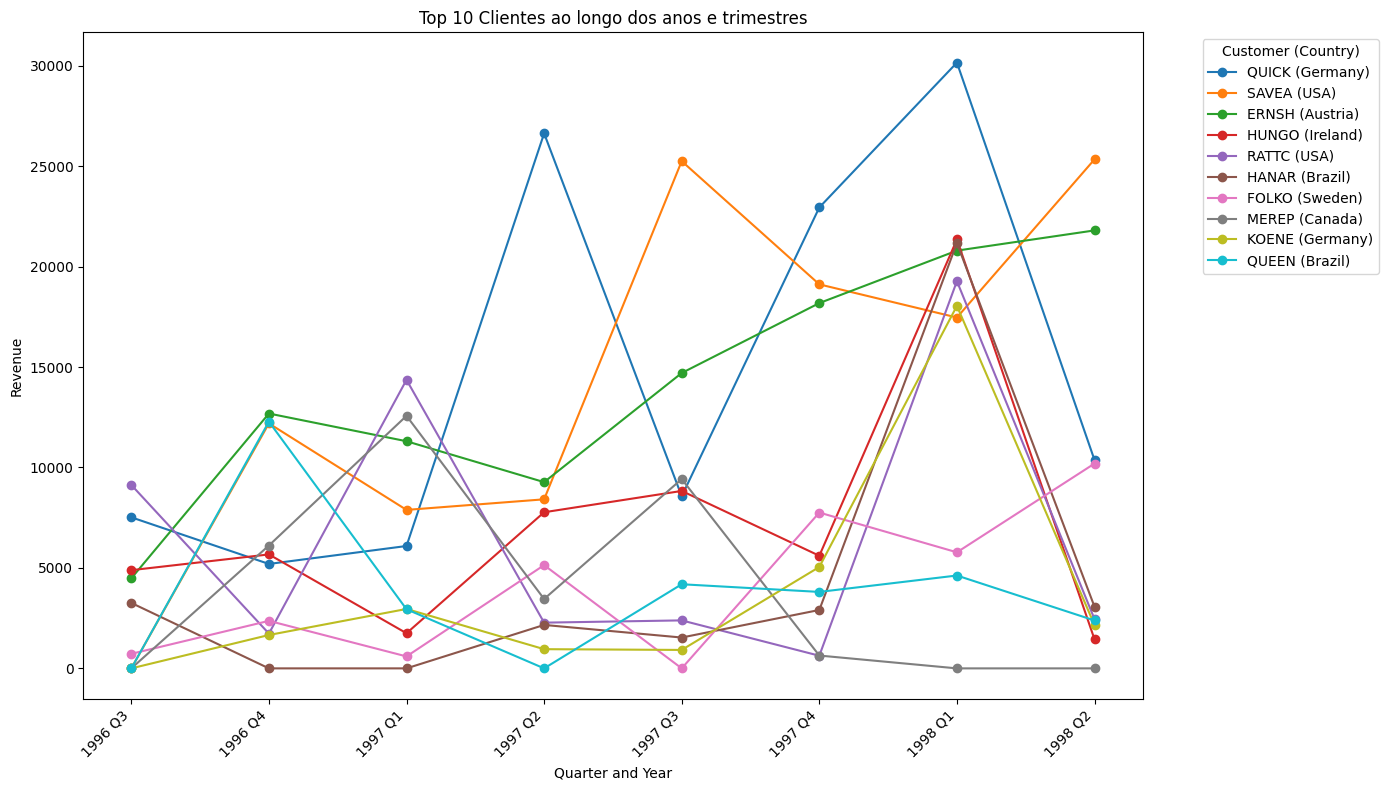

In [35]:
import matplotlib.pyplot as plt

# Adicionar colunas para o ano e o trimestre
full_merged_data1['year'] = full_merged_data1['order_date'].dt.year
full_merged_data1['quarter'] = full_merged_data1['order_date'].dt.to_period('Q')

# Calcular a receita total por cliente
revenue_by_customer = full_merged_data1.groupby('customer_id')['total_price'].sum()

# Ordenar os clientes pela receita total em ordem decrescente
revenue_by_customer_sorted = revenue_by_customer.sort_values(ascending=False)

# Pegar os clientes ranqueados no revenue_by_customer_sorted
ranked_customers = revenue_by_customer_sorted.index

# Filtrar os dados para incluir apenas os clientes ranqueados
ranked_customers_data = full_merged_data1[full_merged_data1['customer_id'].isin(ranked_customers)]

# Agrupar os dados por cliente, ano e trimestre e calcular a receita total
revenue_by_customer_quarter = ranked_customers_data.groupby(['customer_id', 'year', 'quarter'])['total_price'].sum().reset_index()

# Pivotar a tabela para ter os trimestres como colunas
revenue_pivot_table = revenue_by_customer_quarter.pivot_table(index='customer_id', columns=['year', 'quarter'], values='total_price', fill_value=0)

# Renomear as colunas para melhor entendimento
revenue_pivot_table.columns = [f'{col[0]} Q{col[1].quarter}' for col in revenue_pivot_table.columns]
revenue_pivot_table = revenue_pivot_table.reset_index()

# Adicionar a coluna ship_country
# Vamos usar o primeiro ship_country encontrado para cada customer_id
customer_country = ranked_customers_data.groupby('customer_id')['ship_country'].first().reset_index()

# Mesclar a tabela pivotada com a informação de ship_country
revenue_pivot_table = revenue_pivot_table.merge(customer_country, on='customer_id')

# Reordenar a tabela de acordo com o ranking de receita
revenue_pivot_table['rank'] = revenue_pivot_table['customer_id'].apply(lambda x: ranked_customers.get_loc(x))
revenue_pivot_table = revenue_pivot_table.sort_values(by='rank').drop(columns='rank')

# Reordenar as colunas para ter ship_country após customer_id
cols = revenue_pivot_table.columns.tolist()
cols.insert(1, cols.pop(cols.index('ship_country')))
revenue_pivot_table = revenue_pivot_table[cols]

# Filtrar apenas os top 10 clientes
top_10_revenue_pivot_table = revenue_pivot_table.head(10)

# Gerar o plot
plt.figure(figsize=(14, 8))

# Definir os trimestres como eixo x
x_labels = top_10_revenue_pivot_table.columns[2:]  # Ignorar 'customer_id' e 'ship_country'

# Adicionar linhas para cada cliente
for index, row in top_10_revenue_pivot_table.iterrows():
    customer_id = row['customer_id']
    ship_country = row['ship_country']
    y_values = row[x_labels].values
    plt.plot(x_labels, y_values, marker='o', linestyle='-', label=f'{customer_id} ({ship_country})')

# Adicionar título e rótulos aos eixos
plt.title('Top 10 Clientes ao longo dos anos e trimestres')
plt.xlabel('Quarter and Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

# Adicionar legenda
plt.legend(title='Customer (Country)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.savefig('top_10_customer_revenue.png')
plt.show()



![Top10_clientes_trimestres]('top_10_customer_revenue.png')

Analisando o consumo dos principais clientes ao longo dos anos e trimestres, observamos que 50% apresentaram uma queda acentuada entre o primeiro e segundo trimestre do ano de 1998.
Os clientes que não apresentaram foram dos seguintes países : "SAVEA" USA,"ERNSH" Austria,"FOLKO" Sweden e o cliente de id "MEREP" do Canadá se manteve estável.

Vamos agora descobrir de qual/quais vendedores esses clientes compram.

In [36]:
# Filtrar os dados para incluir apenas os top 10 clientes
top_10_customers = top_10_revenue_pivot_table['customer_id']

# Filtrar os dados para incluir apenas os top 10 clientes
top_10_customers_data = full_merged_data1[full_merged_data1['customer_id'].isin(top_10_customers)]

# Calcular o número de vendas por employee para os top 10 clientes
sales_by_employee = top_10_customers_data.groupby('employee_id')['order_id'].count()

# Ordenar os employees pelo número de vendas em ordem decrescente
sales_by_employee_sorted = sales_by_employee.sort_values(ascending=False)

# Gerar a tabela
sales_by_employee_table = pd.DataFrame({'Employee': sales_by_employee_sorted.index, 'Sales Count': sales_by_employee_sorted.values})

# Exibir a tabela
print(sales_by_employee_table)


   Employee  Sales Count
0         1          120
1         3           93
2         4           83
3         8           75
4         2           74
5         7           53
6         6           50
7         9           42
8         5           28


In [37]:
# Supondo que você tenha um DataFrame chamado employees_data com as informações dos employees
# Mesclar a tabela sales_by_employee_table com as informações dos employees
sales_by_employee_table_with_info = sales_by_employee_table.merge(employees, left_on='Employee', right_on='employee_id', how='left')

# Selecionar as colunas relevantes
sales_by_employee_table_with_info = sales_by_employee_table_with_info[['Employee', 'first_name', 'last_name', 'country', 'hire_date', 'reports_to', 'Sales Count','title']]

# Exibir a tabela resultante
print(sales_by_employee_table_with_info)


   Employee first_name  last_name country   hire_date  reports_to  \
0         1      Nancy    Davolio     USA  1992-05-01         2.0   
1         3      Janet  Leverling     USA  1992-04-01         2.0   
2         4   Margaret    Peacock     USA  1993-05-03         2.0   
3         8      Laura   Callahan     USA  1994-03-05         2.0   
4         2     Andrew     Fuller     USA  1992-08-14         NaN   
5         7     Robert       King      UK  1994-01-02         5.0   
6         6    Michael     Suyama      UK  1993-10-17         5.0   
7         9       Anne  Dodsworth      UK  1994-11-15         5.0   
8         5     Steven   Buchanan      UK  1993-10-17         2.0   

   Sales Count                     title  
0          120      Sales Representative  
1           93      Sales Representative  
2           83      Sales Representative  
3           75  Inside Sales Coordinator  
4           74     Vice President, Sales  
5           53      Sales Representative  
6       

In [38]:
employees['country'].unique()

array(['USA', 'UK'], dtype=object)

   Employee first_name  last_name country   hire_date  reports_to  \
0         1      Nancy    Davolio     USA  1992-05-01           2   
1         3      Janet  Leverling     USA  1992-04-01           2   
2         4   Margaret    Peacock     USA  1993-05-03           2   
3         8      Laura   Callahan     USA  1994-03-05           2   
4         2     Andrew     Fuller     USA  1992-08-14           0   
5         7     Robert       King      UK  1994-01-02           5   
6         6    Michael     Suyama      UK  1993-10-17           5   
7         9       Anne  Dodsworth      UK  1994-11-15           5   
8         5     Steven   Buchanan      UK  1993-10-17           2   

   Sales Count                     title  
0          120      Sales Representative  
1           93      Sales Representative  
2           83      Sales Representative  
3           75  Inside Sales Coordinator  
4           74     Vice President, Sales  
5           53      Sales Representative  
6       

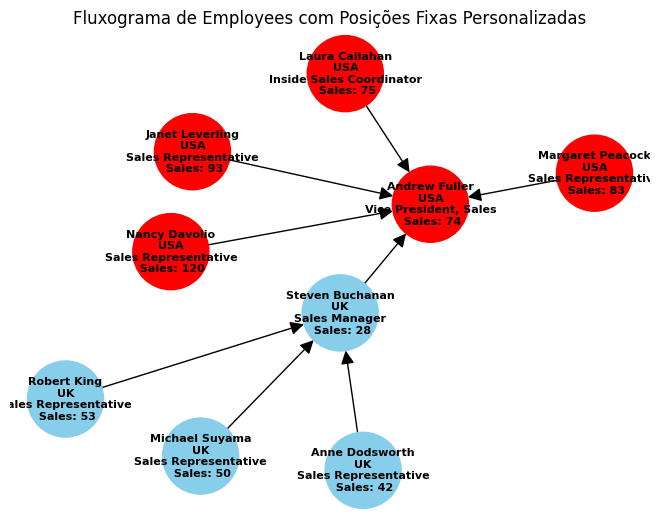

In [39]:
# Supondo que você tenha um DataFrame chamado sales_by_employee_table_with_info com as informações dos employees
# Corrigir o formato da coluna reports_to para int
sales_by_employee_table_with_info['reports_to'] = sales_by_employee_table_with_info['reports_to'].fillna(0).astype(int)

# Selecionar as colunas relevantes
sales_by_employee_table_with_info = sales_by_employee_table_with_info[['Employee', 'first_name', 'last_name', 'country', 'hire_date', 'reports_to', 'Sales Count','title']]

# Exibir a tabela resultante
print(sales_by_employee_table_with_info)

# Criar um grafo vazio
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
node_colors = []  # Lista para armazenar as cores dos nós

for _, row in sales_by_employee_table_with_info.iterrows():
    employee_id = row['Employee']
    first_name = row['first_name']
    last_name = row['last_name']
    country = row['country']
    sales_count = row['Sales Count']
    reports_to = row['reports_to']
    title = row['title']

    # Adicionar o nó com um rótulo detalhado
    label = f"{first_name} {last_name}\n{country}\n{title}\n Sales: {sales_count}"
    G.add_node(employee_id, label=label)

    # Definir a cor do nó
    if country == 'USA':
        node_colors.append('red')
    else:
        node_colors.append('skyblue')

    # Adicionar a aresta se o funcionário reportar a alguém
    if reports_to != 0:
        G.add_edge( employee_id,reports_to)

# Definir posições fixas para os nós no grafo
fixed_positions = nx.spring_layout(G, seed=42, pos={
    1: (0, 0), 3: (0, 1), 4: (1, 1),
    5: (0.2, 0.2), 6: (1.5, 0), 7: (0, 2), 8: (1, 2),
    9: (2, 0.5), 10: (2, 1.5), 11: (0.5, 2.5), 12: (1.5, 2.5),
    2: (0.5, 0.5)  # Posição central para o ID 2
})

# Desenhar o grafo com os rótulos detalhados e posições fixas
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, fixed_positions, labels=labels, with_labels=True, node_size=3000, node_color=node_colors, font_size=8, font_weight="bold", arrowstyle='-|>', arrowsize=20)

# Mostrar o gráfico
plt.title("Fluxograma de Employees com Posições Fixas Personalizadas")
plt.savefig('fluxograma_employees.png')
plt.show()


![fluxograma_funcionários]('fluxograma_employees.png')

Os funcionários que tiveram maior participação nas vendas para os principais clientes foram estes acima.
Notamos que só temos funcionários de dois países (USA, UK). E o vice presidente de vendas é dos USA onde a maior parte desses vendedores e do Sales Manager do Reino Unido se reportam a ele.
As quantidades de vendas dos funcionários de USA são mais representativas do que do Reino Unido.

Agora vamos analisar como foram os envios dos produtos da NorthWind

In [40]:

# Dropar os valores vazios na coluna 'shipped_date'
data_cleaned = full_merged_data1.dropna(subset=['shipped_date'])

# Converter as colunas 'shipped_date' e 'required_date' para o tipo datetime
data_cleaned['shipped_date'] = pd.to_datetime(data_cleaned['shipped_date'])
data_cleaned['required_date'] = pd.to_datetime(data_cleaned['required_date'])

# Calcular se houve envios posteriores à required_date
data_cleaned['late_delivery'] = data_cleaned['shipped_date'] > data_cleaned['required_date']

# Exibir os dados
data_cleaned['late_delivery'].head(20)


<ipython-input-40-21e7f8d1dc0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['shipped_date'] = pd.to_datetime(data_cleaned['shipped_date'])
<ipython-input-40-21e7f8d1dc0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['required_date'] = pd.to_datetime(data_cleaned['required_date'])
<ipython-input-40-21e7f8d1dc0c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
Name: late_delivery, dtype: bool

In [41]:
# Criar uma máscara booleana para as linhas com late_delivery igual a True
mask_late_delivery = data_cleaned['late_delivery']

# Selecionar as colunas desejadas
columns_to_select = ['customer_id', 'employee_id', 'required_date', 'shipped_date', 'ship_via', 'freight', 'ship_name', 'ship_country','late_delivery']

# Aplicar a máscara e selecionar as colunas desejadas para criar o novo DataFrame
late_delivery_data = data_cleaned.loc[mask_late_delivery, columns_to_select]

# Exibir o novo DataFrame
late_delivery_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 15 to 2152
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    92 non-null     object        
 1   employee_id    92 non-null     int64         
 2   required_date  92 non-null     datetime64[ns]
 3   shipped_date   92 non-null     datetime64[ns]
 4   ship_via       92 non-null     object        
 5   freight        92 non-null     object        
 6   ship_name      92 non-null     object        
 7   ship_country   92 non-null     object        
 8   late_delivery  92 non-null     bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(5)
memory usage: 6.6+ KB


In [42]:
# Calcular o número total de envios
total_shipments = len(data_cleaned)

# Calcular o número de envios atrasados
late_shipments = len(late_delivery_data)

# Calcular a porcentagem de envios atrasados
percentage_late_shipments = (late_shipments / total_shipments) * 100

# Calcular a média de dias de atraso
late_delivery_data['required_date'] = pd.to_datetime(late_delivery_data['required_date'])
late_delivery_data['shipped_date'] = pd.to_datetime(late_delivery_data['shipped_date'])
late_delivery_data['days_late'] = (late_delivery_data['shipped_date'] - late_delivery_data['required_date']).dt.days
average_days_late = late_delivery_data['days_late'].mean()

# Exibir os resultados
print("Porcentagem de envios atrasados:", percentage_late_shipments)
print("Média de dias de atraso:", average_days_late)


Porcentagem de envios atrasados: 4.418828049951969
Média de dias de atraso: 6.173913043478261


Porcentagem de envios atrasados: 4.418828049951969
Média de dias de atraso: 6.173913043478261


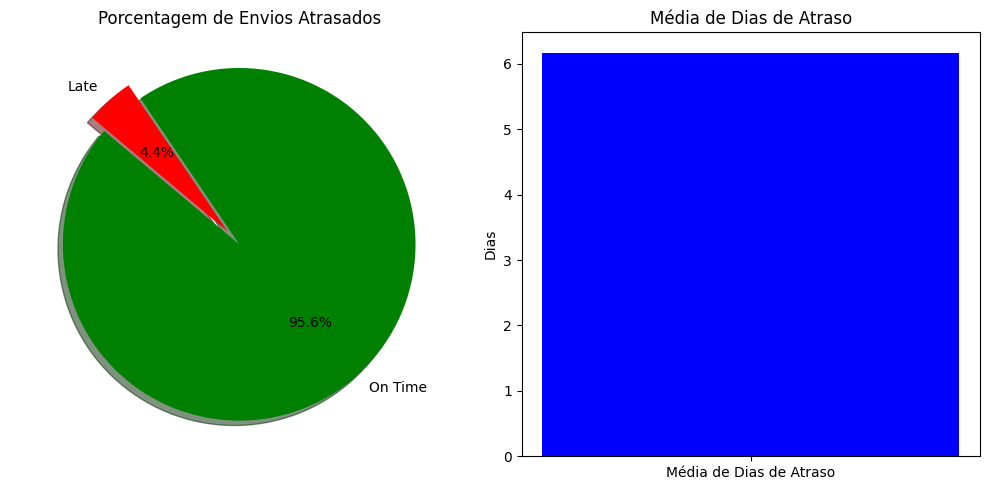

In [43]:
# Calcular o número total de envios
total_shipments = len(data_cleaned)

# Calcular o número de envios atrasados
late_shipments = len(late_delivery_data)

# Calcular a porcentagem de envios atrasados
percentage_late_shipments = (late_shipments / total_shipments) * 100

# Calcular a média de dias de atraso
late_delivery_data['required_date'] = pd.to_datetime(late_delivery_data['required_date'])
late_delivery_data['shipped_date'] = pd.to_datetime(late_delivery_data['shipped_date'])
late_delivery_data['days_late'] = (late_delivery_data['shipped_date'] - late_delivery_data['required_date']).dt.days
average_days_late = late_delivery_data['days_late'].mean()

# Exibir os resultados
print("Porcentagem de envios atrasados:", percentage_late_shipments)
print("Média de dias de atraso:", average_days_late)

# Criar o gráfico de pizza para a porcentagem de envios atrasados
labels = ['On Time', 'Late']
sizes = [100 - percentage_late_shipments, percentage_late_shipments]
colors = ['green', 'red']
explode = (0, 0.1)  # Explode the late slice

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentagem de Envios Atrasados')

# Criar o gráfico de barras para a média de dias de atraso
plt.subplot(1, 2, 2)
plt.bar(['Média de Dias de Atraso'], [average_days_late], color='blue')
plt.ylabel('Dias')
plt.title('Média de Dias de Atraso')

plt.tight_layout()
plt.savefig('pizza_freight.png')
plt.show()


![Gráfico Pizza Fretes]('pizza_freight.png')

Dentre todos os envios feitos pela a empresa tivemos um sucesso de 95,6% do envio ocorrer antes da data requerida.
Dentro desses 4,4% de atraso vamos analisar a porcentagem de cada empresa.

In [44]:

# Agrupar os dados por cliente (customer_id)
customer_late_shipments = late_delivery_data.groupby('customer_id').agg({
    'ship_via': lambda x: x.mode().iloc[0],  # Ship_via mais comum
    'employee_id': lambda x: x.mode().iloc[0],  # Employee_id mais comum
    'days_late': 'mean',  # Média de dias de atraso
    'required_date': 'count'  # Contagem de envios atrasados
}).reset_index()

# Renomear as colunas
customer_late_shipments = customer_late_shipments.rename(columns={
    'required_date': 'late_shipments_count',
    'ship_via': 'most_common_ship_via',
    'employee_id': 'most_common_employee_id',
    'days_late': 'average_days_late'
})

# Ordenar os clientes pelo número de envios atrasados em ordem decrescente
customer_late_shipments = customer_late_shipments.sort_values(by='late_shipments_count', ascending=False)

# Exibir a tabela rankeada
print(customer_late_shipments)


0  customer_id most_common_ship_via  most_common_employee_id  \
11       HUNGO                    1                        3   
19       QUICK                    1                        2   
0        BERGS                    1                        2   
7        GOURL                    3                        1   
22       SAVEA                    3                        4   
27       WHITC                    1                        8   
2        BONAP                    2                        2   
9        HILAA                    1                        3   
23       SEVES                    2                        7   
13       LACOR                    1                        4   
21       REGGC                    1                        2   
15       LEHMS                    2                        7   
25       SUPRD                    2                        4   
12       ISLAT                    2                        4   
4        EASTC                    1     

In [45]:


# Supondo que os dados necessários estão carregados nos DataFrames apropriados

# Agrupar os dados por cliente (customer_id)
customer_late_shipments = late_delivery_data.groupby('customer_id').agg({
    'ship_via': lambda x: x.mode().iloc[0],  # Ship_via mais comum
    'employee_id': lambda x: x.mode().iloc[0],  # Employee_id mais comum
    'days_late': 'mean',  # Média de dias de atraso
    'required_date': 'count'  # Contagem de envios atrasados
}).reset_index()

# Renomear as colunas
customer_late_shipments = customer_late_shipments.rename(columns={
    'required_date': 'late_shipments_count',
    'ship_via': 'most_common_ship_via',
    'employee_id': 'most_common_employee_id',
    'days_late': 'average_days_late'
})

# Ordenar os clientes pelo número de envios atrasados em ordem decrescente
customer_late_shipments = customer_late_shipments.sort_values(by='late_shipments_count', ascending=False)

# Exibir a tabela rankeada
print(customer_late_shipments)

# Acessar os dados dos funcionários que realizaram as vendas com mais atrasos
employee_late_shipments = late_delivery_data.groupby('employee_id').agg({
    'days_late': 'mean',  # Média de dias de atraso
    'required_date': 'count'  # Contagem de envios atrasados
}).reset_index()

# Renomear as colunas
employee_late_shipments = employee_late_shipments.rename(columns={
    'required_date': 'late_shipments_count',
    'days_late': 'average_days_late'
})

# Ordenar os funcionários pelo número de envios atrasados em ordem decrescente
employee_late_shipments = employee_late_shipments.sort_values(by='late_shipments_count', ascending=False)

# Exibir a tabela rankeada dos funcionários
print(employee_late_shipments)



# Certificar-se de que as colunas ship_via e shipper_id tenham o mesmo tipo
late_delivery_data['ship_via'] = late_delivery_data['ship_via'].astype(str)
shippers['shipper_id'] = shippers['shipper_id'].astype(str)

# Calcular a porcentagem de envios atrasados por shipper
shipper_late_shipments = late_delivery_data.groupby('ship_via').agg({
    'required_date': 'count'  # Contagem de envios atrasados
}).reset_index()

# Renomear as colunas
shipper_late_shipments = shipper_late_shipments.rename(columns={
    'required_date': 'late_shipments_count',
    'ship_via': 'shipper_id'
})

# Calcular a porcentagem de atrasos por shipper
total_late_shipments = shipper_late_shipments['late_shipments_count'].sum()
shipper_late_shipments['percentage_late_shipments'] = (shipper_late_shipments['late_shipments_count'] / total_late_shipments) * 100

# Mesclar com a tabela shippers para obter os nomes das empresas
shipper_late_shipments = shipper_late_shipments.merge(shippers, on='shipper_id', how='left')

#Dos envios atrasados a porcentagem de capa copany
# Ordenar os shippers pela porcentagem de envios atrasados em ordem decrescente
shipper_late_shipments = shipper_late_shipments.sort_values(by='percentage_late_shipments', ascending=False)

# Exibir a tabela rankeada dos shippers
print(shipper_late_shipments[['company_name', 'percentage_late_shipments']])



0  customer_id most_common_ship_via  most_common_employee_id  \
11       HUNGO                    1                        3   
19       QUICK                    1                        2   
0        BERGS                    1                        2   
7        GOURL                    3                        1   
22       SAVEA                    3                        4   
27       WHITC                    1                        8   
2        BONAP                    2                        2   
9        HILAA                    1                        3   
23       SEVES                    2                        7   
13       LACOR                    1                        4   
21       REGGC                    1                        2   
15       LEHMS                    2                        7   
25       SUPRD                    2                        4   
12       ISLAT                    2                        4   
4        EASTC                    1     

In [46]:
shipper_late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 1 to 2
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   shipper_id                 3 non-null      object 
 1   late_shipments_count       3 non-null      int64  
 2   percentage_late_shipments  3 non-null      float64
 3   company_name               3 non-null      object 
 4   phone                      3 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 144.0+ bytes


In [47]:


# Garantir que a coluna 'freight' contenha apenas valores numéricos
full_merged_data1['freight'] = pd.to_numeric(full_merged_data1['freight'], errors='coerce')

# Remover linhas com valores NaN na coluna 'freight'
full_merged_data1 = full_merged_data1.dropna(subset=['freight'])

# Calcular a média do Freight por ship_via usando a tabela full_merged_data1
average_freight_by_shipper_all = full_merged_data1.groupby('ship_via').agg({
    'freight': 'mean'  # Média de frete
}).reset_index()

# Renomear a coluna
average_freight_by_shipper_all = average_freight_by_shipper_all.rename(columns={
    'ship_via': 'shipper_id',
    'freight': 'average_freight'
})

# Mesclar com a tabela shippers para obter os nomes das empresas
average_freight_by_shipper_all = average_freight_by_shipper_all.merge(shippers, on='shipper_id', how='left')

# Selecionar e ordenar as colunas
average_freight_table_all = average_freight_by_shipper_all[['company_name', 'average_freight']]
average_freight_table_all = average_freight_table_all.sort_values(by='average_freight', ascending=False)

# Exibir a tabela
print(average_freight_table_all)

# Exibir a tabela no formato tabulate
from tabulate import tabulate
print(tabulate(average_freight_table_all, headers='keys', tablefmt='pretty'))

       company_name  average_freight
1    United Package       105.983576
2  Federal Shipping        98.364558
0    Speedy Express        80.946053
+---+------------------+--------------------+
|   |   company_name   |  average_freight   |
+---+------------------+--------------------+
| 1 |  United Package  | 105.98357638888889 |
| 2 | Federal Shipping | 98.36455813953488  |
| 0 |  Speedy Express  | 80.94605263157895  |
+---+------------------+--------------------+


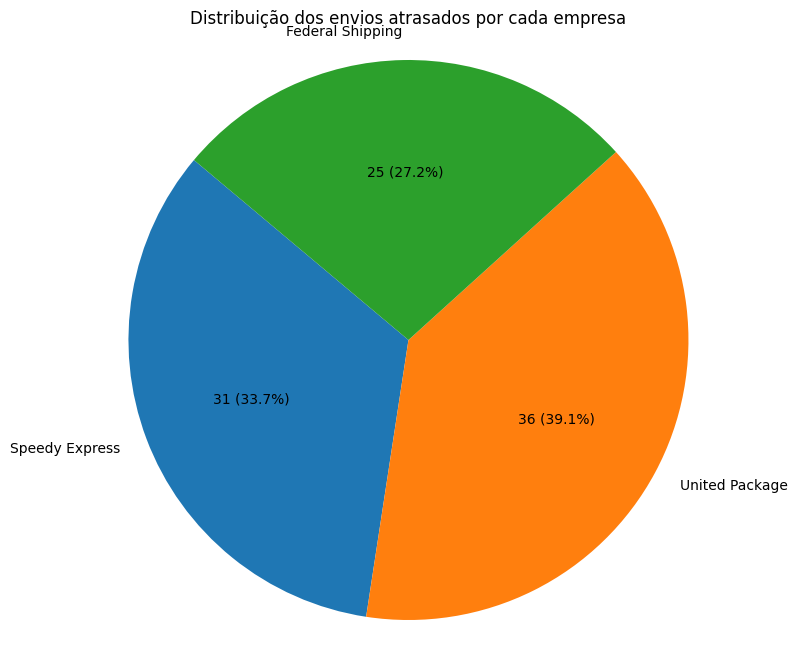

In [48]:


# Calcular a quantidade de envios atrasados por shipper
shipper_late_shipments = late_delivery_data.groupby('ship_via').agg({
    'required_date': 'count'  # Contagem de envios atrasados
}).reset_index()

# Renomear as colunas
shipper_late_shipments = shipper_late_shipments.rename(columns={
    'required_date': 'late_shipments_count',
    'ship_via': 'shipper_id'
})


shippers['shipper_id'] = shippers['shipper_id'].astype(str)
shipper_late_shipments['shipper_id'] = shipper_late_shipments['shipper_id'].astype(str)
shipper_late_shipments = shipper_late_shipments.merge(shippers, on='shipper_id', how='left')

# Calcular a porcentagem de atrasos por shipper
total_late_shipments = shipper_late_shipments['late_shipments_count'].sum()
shipper_late_shipments['percentage_late_shipments'] = (shipper_late_shipments['late_shipments_count'] / total_late_shipments) * 100

# Função para criar labels com a quantidade absoluta e a porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} ({pct:.1f}%)'
    return my_autopct

# Plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(shipper_late_shipments['late_shipments_count'], labels=shipper_late_shipments['company_name'], autopct=make_autopct(shipper_late_shipments['late_shipments_count']), startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adicionar título
plt.title('Distribuição dos envios atrasados por cada empresa')

# Exibir o gráfico
plt.savefig('pizza_freight_company.png')
plt.show()


![Empresas Frete]('pizza_freight_company.png')

A empresa United Package que teve maior participação nos envios atrasados é justamente a que tem uma média de valor de frete mais alta.